In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library("ggplot2")
library("ggrepel")
library("ggcorrplot")
library("DT")

In [3]:
fm <- function(vec){
    # Get the frequency of each value
frequency <- table(vec)

# Get the mode of the vector
mode <- names(which.max(frequency))

# Print the mode and frequency
print(mode)
print(max(frequency))
print(sapply(vec, sd))
print(sapply(vec, var))
}

In [4]:
cases <- read_csv("COVID-19_cases_plus_census.csv")

Rows: 3142 Columns: 259
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (5): county_fips_code, county_name, state, state_fips_code, geo_id
dbl  (243): confirmed_cases, deaths, nonfamily_households, family_households...
lgl   (10): pop_5_years_over, speak_only_english_at_home, speak_spanish_at_h...
date   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
pol_data <- read.csv('countypres_2000-2020.csv')
pol_data <- pol_data %>% filter(year == 2020)

In [6]:
require(data.table)
group <- as.data.table(pol_data)
pol_data <- as.data.frame(group[group[, .I[candidatevotes == max(candidatevotes)], by=county_fips]$V1])

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [7]:
cases <- merge(cases, pol_data, by.x = 'county_fips_code', by.y = 'county_fips')

In [8]:
cases

county_fips_code,county_name.x,state.x,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,⋯,state.y,state_po,county_name.y,office,candidate,party,candidatevotes,totalvotes,version,mode
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
10001,Kent County,DE,10,2021-01-19,11548,187,10001,19148,44233,⋯,DELAWARE,DE,KENT,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,44552,87025,20220315,TOTAL
10003,New Castle County,DE,10,2021-01-19,40753,514,10003,70889,131765,⋯,DELAWARE,DE,NEW CASTLE,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,195034,287633,20220315,TOTAL
10005,Sussex County,DE,10,2021-01-19,18844,320,10005,26815,59507,⋯,DELAWARE,DE,SUSSEX,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,71230,129352,20220315,TOTAL
12001,Alachua County,FL,12,2021-01-19,18986,156,12001,46494,50991,⋯,FLORIDA,FL,ALACHUA,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,89704,142604,20220315,TOTAL
12003,Baker County,FL,12,2021-01-19,2853,41,12003,2002,6297,⋯,FLORIDA,FL,BAKER,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,11911,14059,20220315,TOTAL
12005,Bay County,FL,12,2021-01-19,14254,255,12005,24119,44548,⋯,FLORIDA,FL,BAY,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,66097,93024,20220315,TOTAL
12007,Bradford County,FL,12,2021-01-19,2515,29,12007,3209,5771,⋯,FLORIDA,FL,BRADFORD,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,10334,13632,20220315,TOTAL
12009,Brevard County,FL,12,2021-01-19,26488,591,12009,82056,145167,⋯,FLORIDA,FL,BREVARD,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,207883,360764,20220315,TOTAL
12011,Broward County,FL,12,2021-01-19,160514,1990,12011,241941,433887,⋯,FLORIDA,FL,BROWARD,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,618752,957672,20220315,TOTAL


In [9]:
duplicates <- cases[duplicated(cases$county_fips_code), duplicated(cases$county_name)]

In [10]:
print(duplicates)

data frame with 0 columns and 0 rows


In [11]:
missing_data <- colSums(is.na(cases))
print(missing_data)

                                              county_fips_code 
                                                             0 
                                                 county_name.x 
                                                             0 
                                                       state.x 
                                                             0 
                                               state_fips_code 
                                                             0 
                                                          date 
                                                             0 
                                               confirmed_cases 
                                                             0 
                                                        deaths 
                                                             0 
                                                        geo_id 
                                        

In [117]:
cases_TX <- cases %>% filter(state.x == "TX")
dim(cases_TX)

[1] 254 270

In [118]:
summary(cases_TX[,1:20])

 county_fips_code   county_name.x        state.x          state_fips_code   
 Length:254         Length:254         Length:254         Length:254        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
      date            confirmed_cases      deaths           geo_id         
 Min.   :2021-01-19   Min.   :     1   Min.   :   0.00   Length:254        
 1st Qu.:2021-01-19   1st Qu.:   487   1st Qu.:  13.00   Class :character  
 Median :2021-01-19   Median :  1310   Median :  30.00   Mode  :character  
 Mean   :2021-01-19   Mean   :  8419   Mean   : 127.48                     
 3rd Qu.:2021-01-19   3rd Qu.:  3502   3rd Qu.:  78.75                     
 Max.

In [14]:
colnames(cases_TX)

[1] "county_fips_code"                                              
  [2] "county_name.x"                                                 
  [3] "state.x"                                                       
  [4] "state_fips_code"                                               
  [5] "date"                                                          
  [6] "confirmed_cases"                                               
  [7] "deaths"                                                        
  [8] "geo_id"                                                        
  [9] "nonfamily_households"                                          
 [10] "family_households"                                             
 [11] "median_year_structure_built"                                   
 [12] "rent_burden_not_computed"                                      
 [13] "rent_over_50_percent"                                          
 [14] "rent_40_to_50_percent"                                         
 [15] "rent_35_to_40_percent"                                         
 [16] "rent_30_to_35_percent"                                         
 [17] "rent_25_to_30_percent"                                         
 [18] "rent_20_to_25_percent"                                         
 [19] "rent_15_to_20_percent"                                         
 [20] "rent_10_to_15_percent"                                         
 [21] "rent_under_10_percent"                                         
 [22] "total_pop"                                                     
 [23] "male_pop"                                                      
 [24] "female_pop"                                                    
 [25] "median_age"                                                    
 [26] "white_pop"                                                     
 [27] "black_pop"                                                     
 [28] "asian_pop"                                                     
 [29] "hispanic_pop"                                                  
 [30] "amerindian_pop"                                                
 [31] "other_race_pop"                                                
 [32] "two_or_more_races_pop"                                         
 [33] "not_hispanic_pop"                                              
 [34] "commuters_by_public_transportation"                            
 [35] "households"                                                    
 [36] "median_income"                                                 
 [37] "income_per_capita"                                             
 [38] "housing_units"                                                 
 [39] "vacant_housing_units"                                          
 [40] "vacant_housing_units_for_rent"                                 
 [41] "vacant_housing_units_for_sale"                                 
 [42] "median_rent"                                                   
 [43] "percent_income_spent_on_rent"                                  
 [44] "owner_occupied_housing_units"                                  
 [45] "million_dollar_housing_units"                                  
 [46] "mortgaged_housing_units"                                       
 [47] "families_with_young_children"                                  
 [48] "two_parent_families_with_young_children"                       
 [49] "two_parents_in_labor_force_families_with_young_children"       
 [50] "two_parents_father_in_labor_force_families_with_young_children"
 [51] "two_parents_mother_in_labor_force_families_with_young_children"
 [52] "two_parents_not_in_labor_force_families_with_young_children"   
 [53] "one_parent_families_with_young_children"                       
 [54] "father_one_parent_families_with_young_children"                
 [55] "father_in_labor_force_one_parent_families_with_young_children" 
 [56] "commute_10_14_mins"                                            
 [57] "commute_15_19_mins"

In [15]:
fm(cases_TX['county_fips_code'])

[1] "48001"
[1] 1
county_fips_code 
        146.9354 
county_fips_code 
           21590 


In [16]:
fm(cases_TX['date'])

[1] "2021-01-19"
[1] 254
date 
   0 
date 
   0 


In [17]:
fm(cases_TX['state'])

ERROR: Error in `[.data.frame`(cases_TX, "state"): undefined columns selected


In [18]:
fm(cases_TX['county_name.x'])

[1] "Anderson County"
[1] 1


Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"


county_name.x 
           NA 


Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"


county_name.x 
           NA 


In [19]:
summary(cases_TX['median_income'])

 median_income  
 Min.   :24794  
 1st Qu.:42327  
 Median :48311  
 Mean   :49894  
 3rd Qu.:55741  
 Max.   :93645  

In [20]:
stats <- boxplot.stats(cases_TX$median_income)
print(stats)

$stats
[1] 24794 42313 48311 55741 75815

$n
[1] 254

$conf
[1] 46979.77 49642.23

$out
 [1] 77708 76426 90124 80290 93645 81023 80938 79167 93269 79123



In [21]:
fm(cases_TX['median_income'])

[1] "42500"
[1] 2
median_income 
     12132.68 
median_income 
    147201815 


In [22]:
summary(cases_TX['confirmed_cases'])

 confirmed_cases 
 Min.   :     1  
 1st Qu.:   487  
 Median :  1310  
 Mean   :  8419  
 3rd Qu.:  3502  
 Max.   :286356  

In [23]:
fm(cases_TX['confirmed_cases'])

[1] "207"
[1] 2
confirmed_cases 
       29570.38 
confirmed_cases 
      874407557 


In [24]:
stats <- boxplot.stats(cases_TX$confirmed_cases)
print(stats)

$stats
[1]    1.0  487.0 1310.5 3506.0 7460.0

$n
[1] 254

$conf
[1] 1011.202 1609.798

$out
 [1]  16512 152231  26046  16634  32698  64721 234625  46272  12222  16403
[11] 107552  44067  26898   8983   8451   9123 286356  14460  56455  15937
[21]  14435  11450  45600  21894   8320  13334  33006  31926  11314  15947
[31]  15104   8222  15406 195518  13275  11547  61468  34690  13325  29796



In [25]:
summary(cases_TX['deaths'])

     deaths       
 Min.   :   0.00  
 1st Qu.:  13.00  
 Median :  30.00  
 Mean   : 127.48  
 3rd Qu.:  78.75  
 Max.   :3825.00  

In [26]:
fm(cases_TX['deaths'])

[1] "20"
[1] 8
  deaths 
382.1727 
deaths 
146056 


In [27]:
stats <- boxplot.stats(cases_TX$deaths)
print(stats$out)

 [1]  193  214 2040  277 1126  483  190 2453  439  269  201 1940  439  251  225
[16]  221 3825 2018  263  213  648  344  223  202  326  517  302  208  309  214
[31] 1798  263  204  626  513  260  269


In [28]:
summary(cases_TX['total_pop'])

   total_pop      
 Min.   :     74  
 1st Qu.:   7072  
 Median :  18612  
 Mean   : 107951  
 3rd Qu.:  49295  
 Max.   :4525519  

In [29]:
fm(cases_TX['total_pop'])

[1] "74"
[1] 1
total_pop 
 389476.9 
   total_pop 
151692226474 


In [30]:
stats <- boxplot.stats(cases_TX$total_pop)
print(stats$out)

 [1]  336506 1892004  345995  214231  420201  914075  129100 2552213  781321
[10]  155744  164092  834825  711421  321184  126146  123402  150889 4525519
[19]  194843  839539  254574  160173  114852  298042  245720  159883  535187
[28]  358484  125963  121230  130552  222277 1983675  135371  116906 1176584
[37]  269624  131778  508313


In [31]:
summary(cases_TX['bachelors_degree'])

 bachelors_degree  
 Min.   :     3.0  
 1st Qu.:   455.5  
 Median :  1289.5  
 Mean   : 12947.9  
 3rd Qu.:  4144.5  
 Max.   :559393.0  

In [32]:
fm(cases_TX['bachelors_degree'])

[1] "237"
[1] 3
bachelors_degree 
        50848.12 
bachelors_degree 
      2585531649 


In [33]:
stats <- boxplot.stats(cases_TX$bachelors_degree)
print(stats$out)

 [1]  32377 208782  42804  23839  29742 194541  21295 311327 148204  10084
[11]  16526  76291 129438  41264  11483  11233  17245 559393  27823  59522
[21]  21920  13984  10175  31162  21969  19394  77686  31165  16056  17818
[31]  15356  25104 264881  13250  12276 240380  18078  12916  89380


In [34]:
summary(cases_TX['party'])

    party          
 Length:254        
 Class :character  
 Mode  :character  

In [35]:
fm(cases_TX['party'])

[1] "REPUBLICAN"
[1] 232


Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"


party 
   NA 


Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"


party 
   NA 


In [36]:
unique(cases_TX$party)

[1] "REPUBLICAN" "DEMOCRAT"

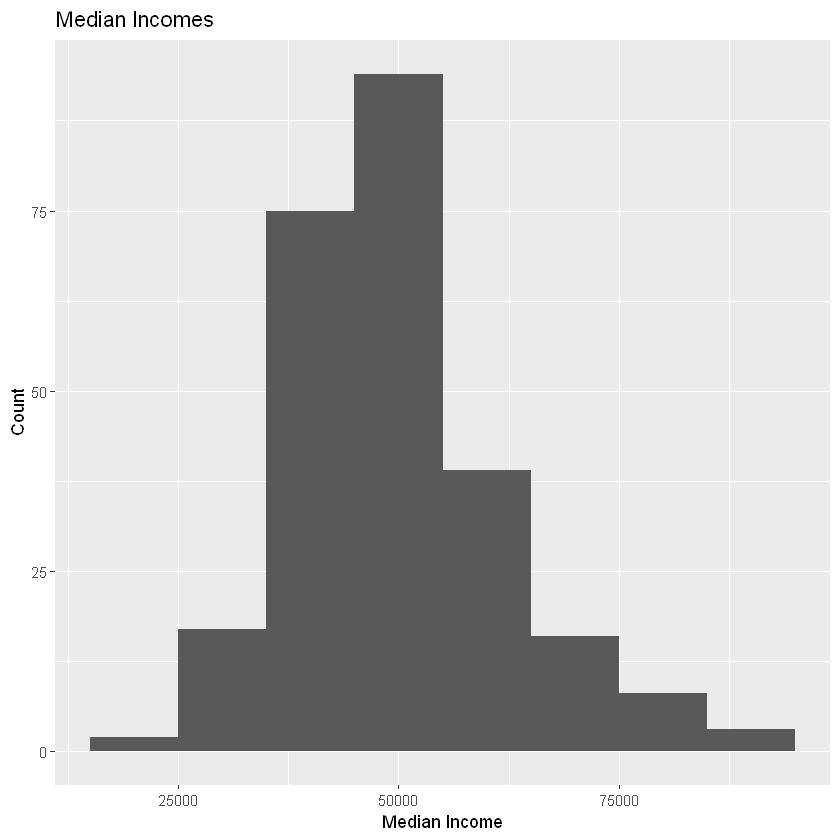

In [37]:
ggplot(cases_TX['median_income'], aes(x = median_income)) +
  geom_histogram(binwidth = 10000) +
  ggtitle("Median Incomes") +
  xlab("Median Income") +
  ylab("Count")

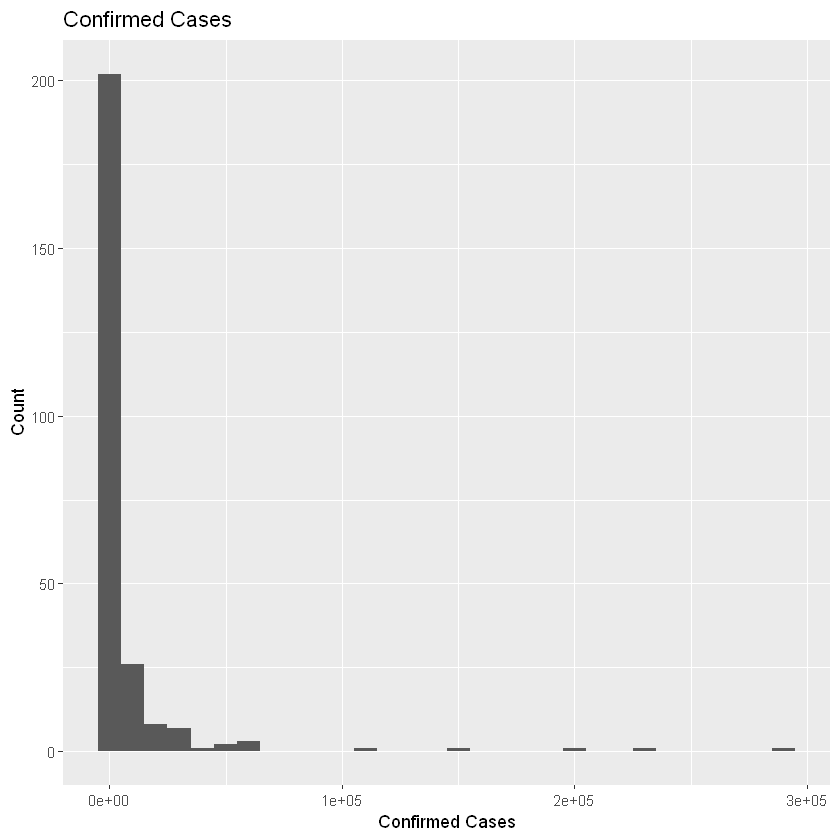

In [38]:
ggplot(cases_TX['confirmed_cases'], aes(x = confirmed_cases)) +
  geom_histogram(binwidth = 10000) +
  ggtitle("Confirmed Cases") +
  xlab("Confirmed Cases") +
  ylab("Count")

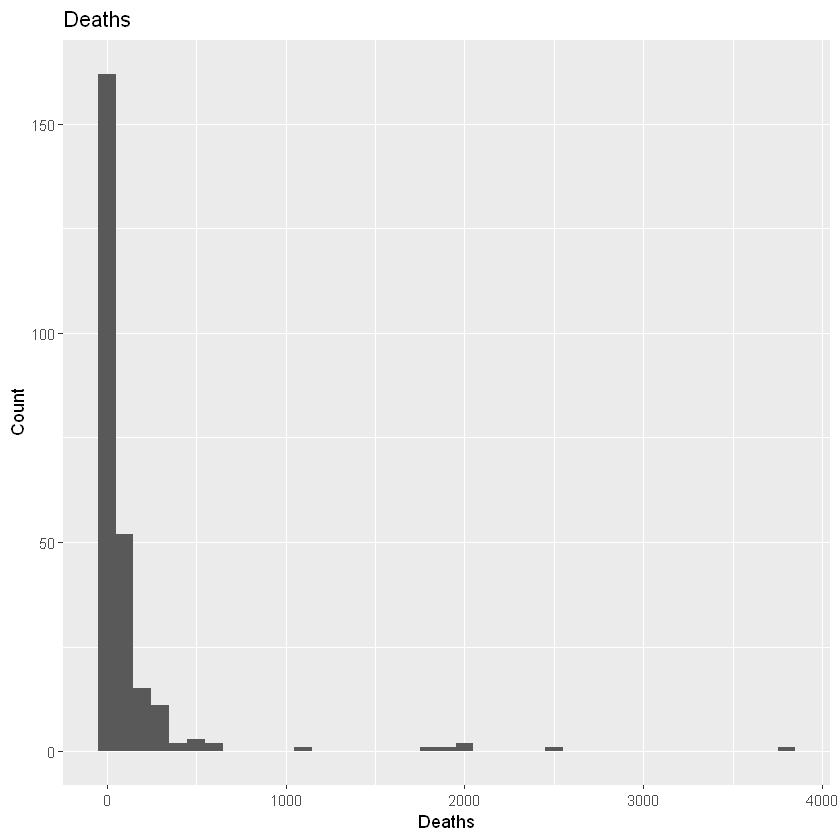

In [39]:
ggplot(cases_TX['deaths'], aes(x = deaths)) +
  geom_histogram(binwidth = 100) +
  ggtitle("Deaths") +
  xlab("Deaths") +
  ylab("Count")

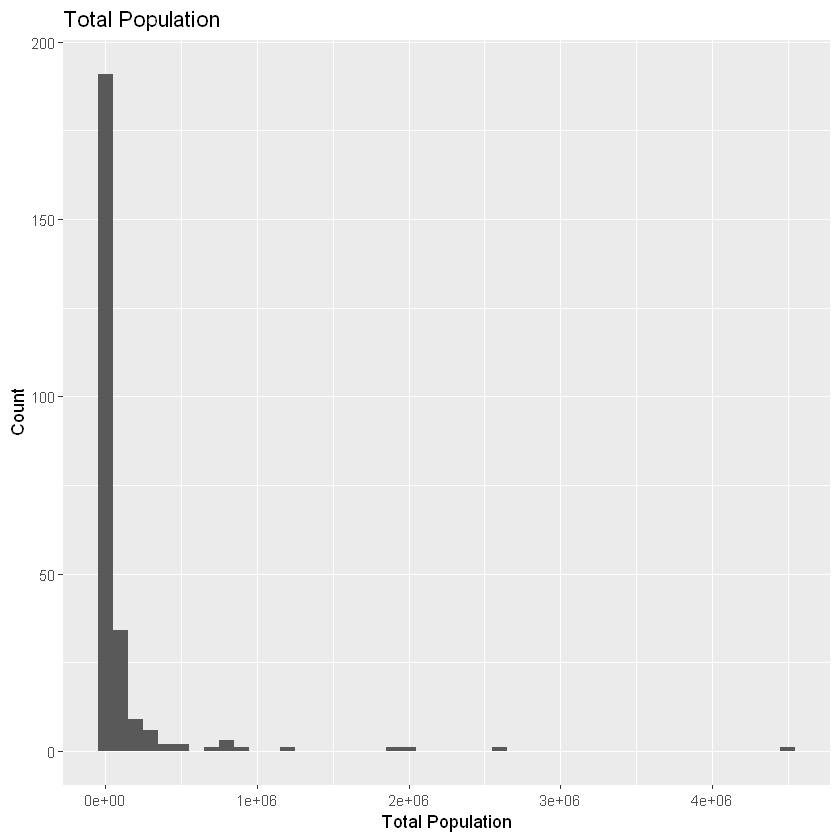

In [40]:
ggplot(cases_TX['total_pop'], aes(x = total_pop)) +
  geom_histogram(binwidth = 100000) +
  ggtitle("Total Population") +
  xlab("Total Population") +
  ylab("Count")

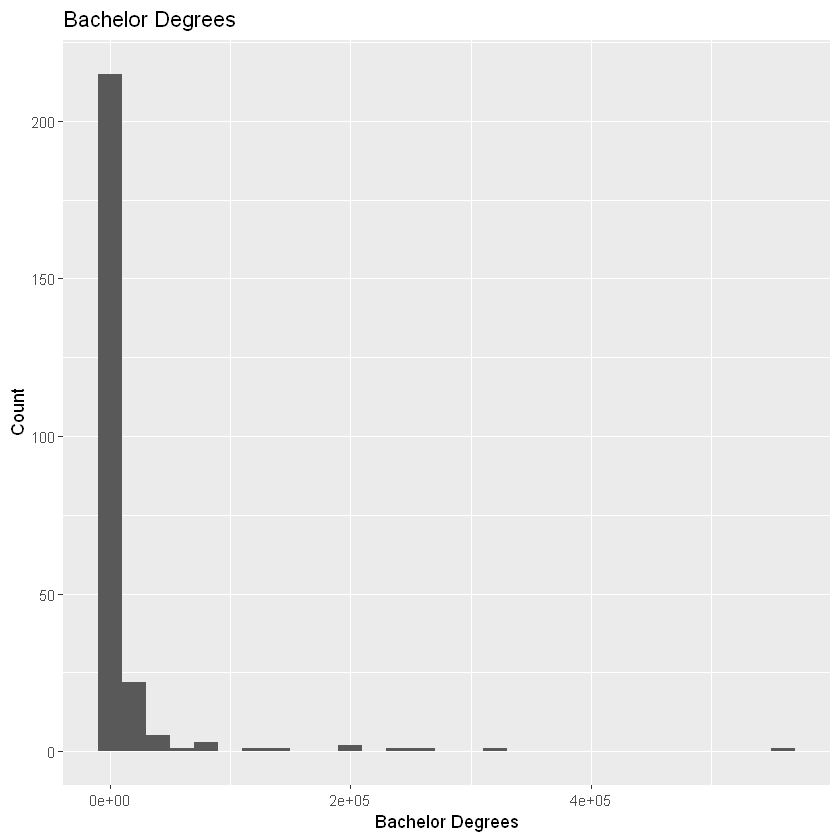

In [41]:
ggplot(cases_TX['bachelors_degree'], aes(x = bachelors_degree)) +
  geom_histogram(binwidth = 20000) +
  ggtitle("Bachelor Degrees") +
  xlab("Bachelor Degrees") +
  ylab("Count")

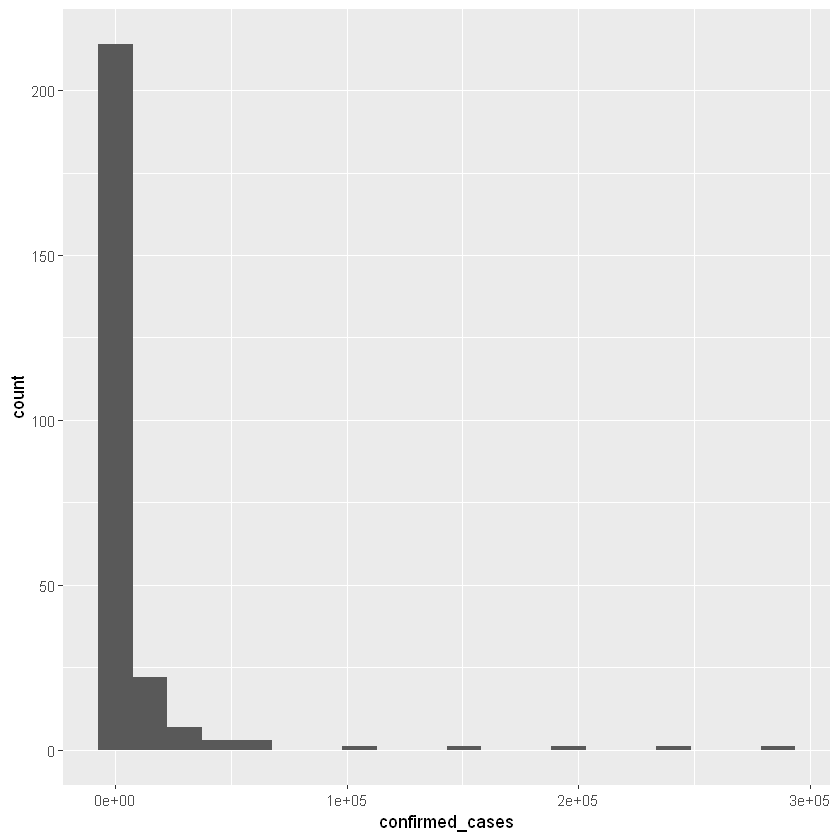

In [42]:
ggplot(cases_TX, mapping = aes(confirmed_cases)) + geom_histogram(bins = 20)

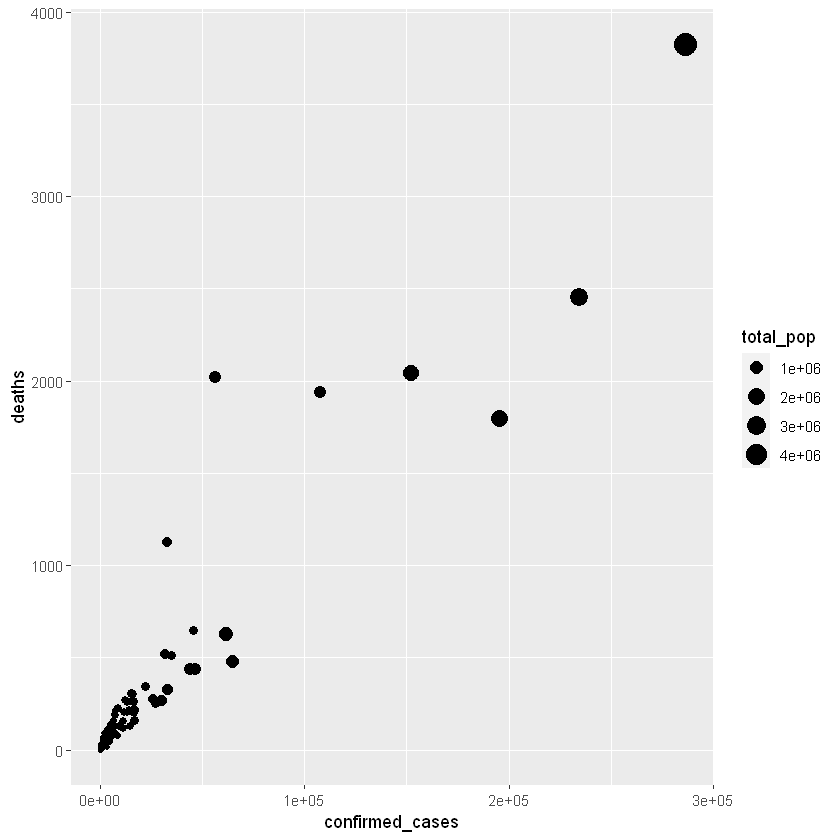

In [43]:
ggplot(cases_TX, mapping = aes(x = confirmed_cases, y = deaths, size = total_pop)) + geom_point()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


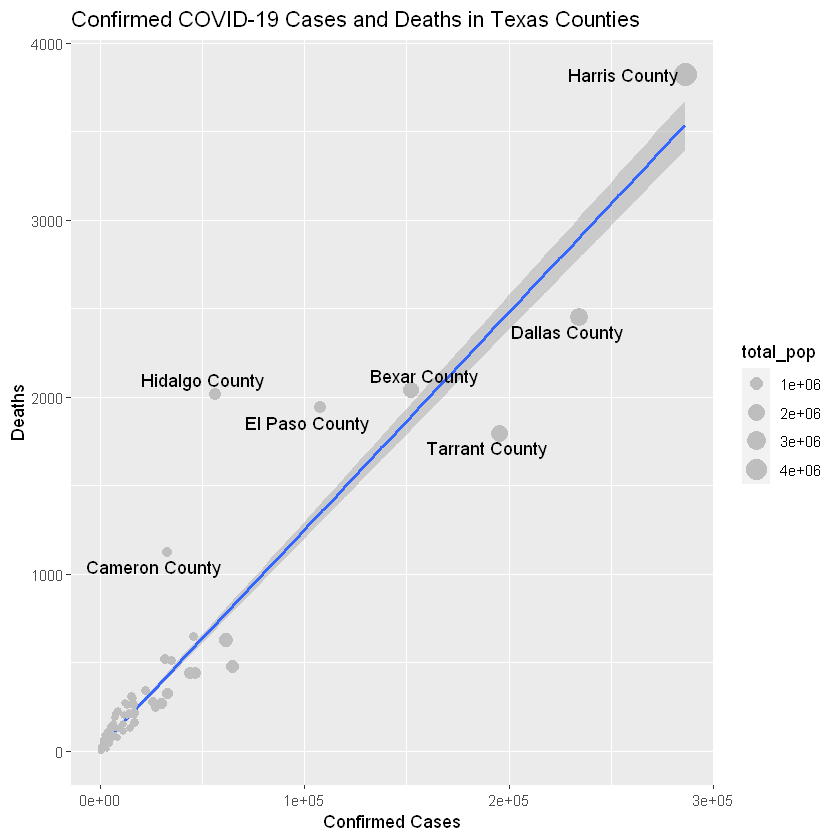

In [44]:
ggplot(cases_TX, mapping = aes(x = confirmed_cases, y = deaths, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX, deaths >= 1000)) + 
ggtitle("Confirmed COVID-19 Cases and Deaths in Texas Counties") +
  xlab("Confirmed Cases") +
  ylab("Deaths")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


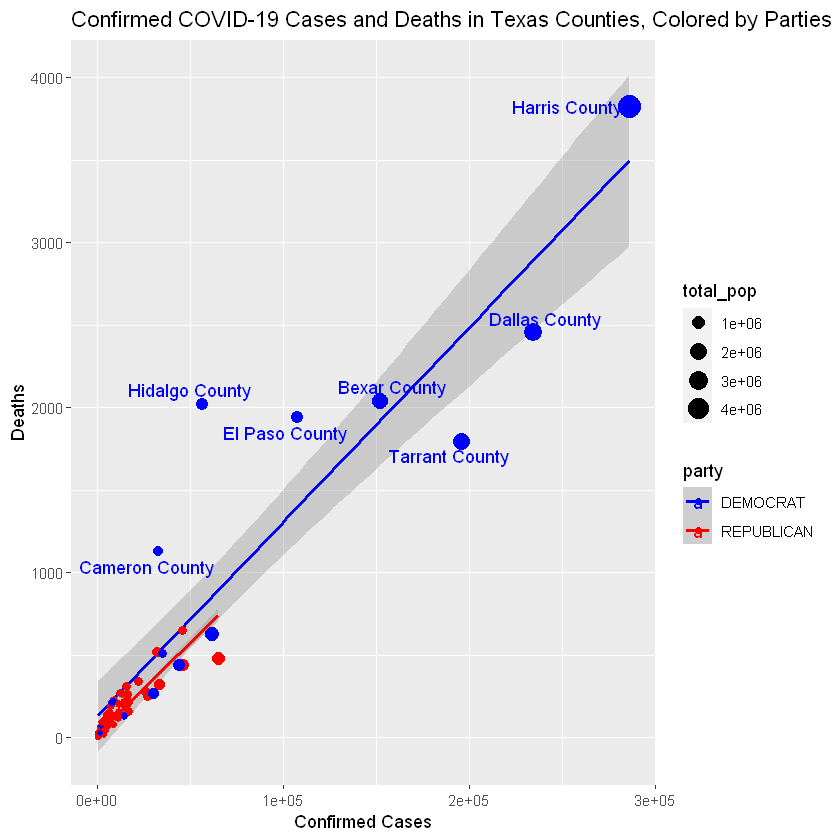

In [45]:
ggplot(cases_TX, mapping = aes(x = confirmed_cases, y = deaths, color = party, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop, color = party)) + 
  geom_text_repel(data = subset(cases_TX, deaths >= 1000)) + 
  scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
  ggtitle("Confirmed COVID-19 Cases and Deaths in Texas Counties, Colored by Parties") +
  xlab("Confirmed Cases") +
  ylab("Deaths")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


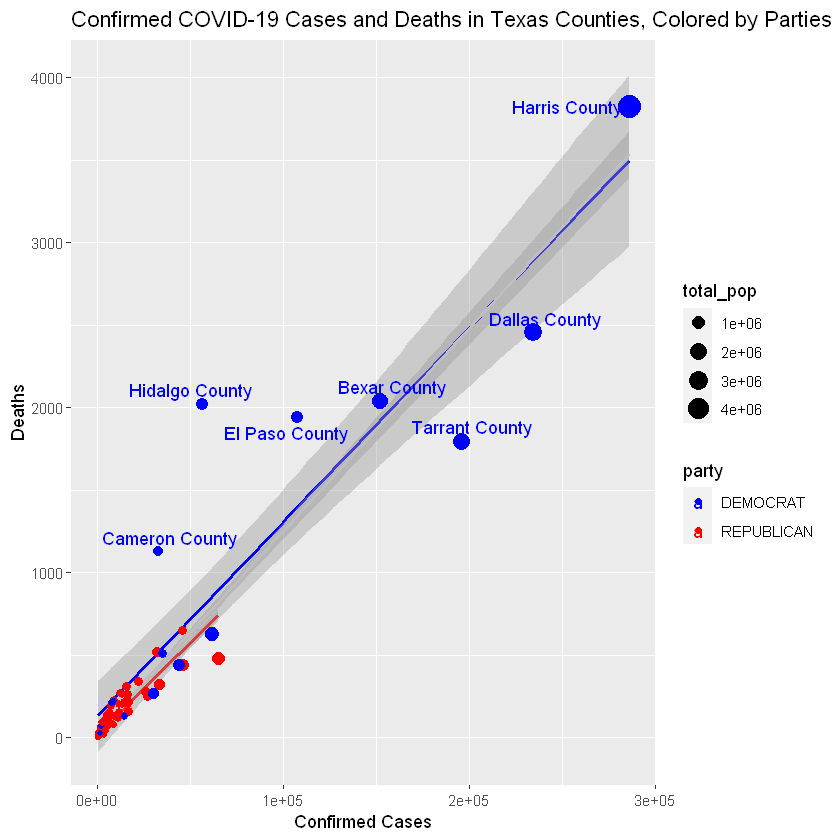

In [46]:
cases_TX_republican <- subset(cases_TX, party == "REPUBLICAN")
cases_TX_democrat <- subset(cases_TX, party == "DEMOCRAT")

# Plot the points and fit lines
ggplot(cases_TX, mapping = aes(x = confirmed_cases, y = deaths, color = party, label = county_name.x)) + 
  geom_smooth(data = cases_TX_republican, method = lm, color = "red") +
  geom_smooth(data = cases_TX_democrat, method = lm, color = "blue") +
  geom_smooth(data = cases_TX, method = lm, color = "grey") +
  geom_point(mapping = aes(size = total_pop, color = party)) + 
  geom_text_repel(data = subset(cases_TX, deaths >= 1000)) + 
  scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
  ggtitle("Confirmed COVID-19 Cases and Deaths in Texas Counties, Colored by Parties") +
  xlab("Confirmed Cases") +
  ylab("Deaths")

In [47]:
cases_TX_select <- cases_TX %>% filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name.x, confirmed_cases, deaths, total_pop, median_income, party, bachelors_degree)
cases_TX_select <- cases_TX_select %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases)

head(cases_TX_select)

,county_name.x,confirmed_cases,deaths,total_pop,median_income,party,bachelors_degree,cases_per_1000,deaths_per_1000,death_per_case
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Harris County,286356,3825,4525519,57791,DEMOCRAT,559393,63.27584,0.8452069,0.013357499
2,Dallas County,234625,2453,2552213,53626,DEMOCRAT,311327,91.93002,0.9611267,0.010454981
3,Tarrant County,195518,1798,1983675,62532,DEMOCRAT,264881,98.56352,0.9063985,0.009196084
4,Bexar County,152231,2040,1892004,53999,DEMOCRAT,208782,80.46019,1.0782218,0.013400687
5,El Paso County,107552,1940,834825,43244,DEMOCRAT,76291,128.83179,2.3238403,0.018037786
6,Collin County,64721,483,914075,90124,REPUBLICAN,194541,70.80491,0.5284030,0.007462802


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


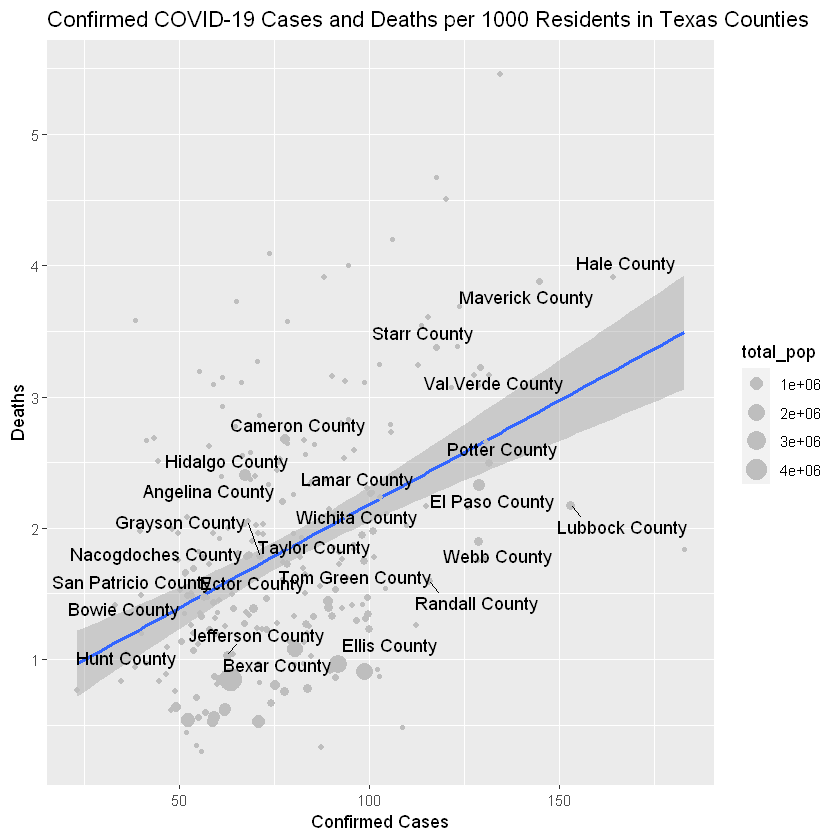

In [48]:
ggplot(cases_TX_select, mapping = aes(x = cases_per_1000, y = deaths_per_1000, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX_select, deaths >= 100)) +
ggtitle("Confirmed COVID-19 Cases and Deaths per 1000 Residents in Texas Counties") +
  xlab("Confirmed Cases") +
  ylab("Deaths")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"ggrepel: 33 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


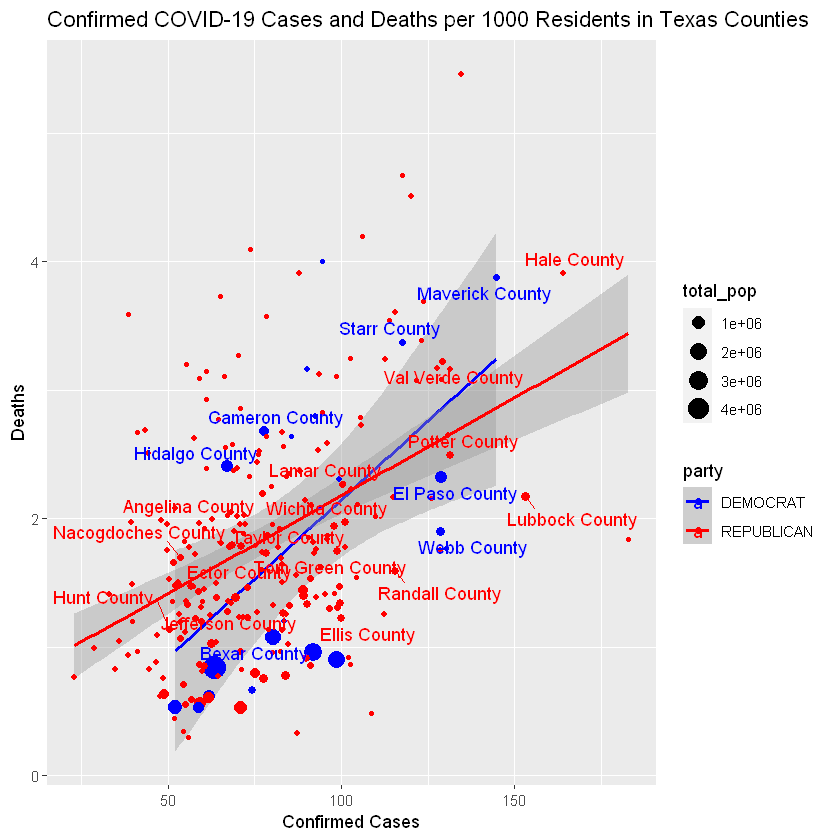

In [49]:
ggplot(cases_TX_select, mapping = aes(x = cases_per_1000, y = deaths_per_1000, color = party, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop, color = party)) + 
  geom_text_repel(data = subset(cases_TX_select, deaths >= 100)) + 
  scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
ggtitle("Confirmed COVID-19 Cases and Deaths per 1000 Residents in Texas Counties") +
  xlab("Confirmed Cases") +
  ylab("Deaths")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


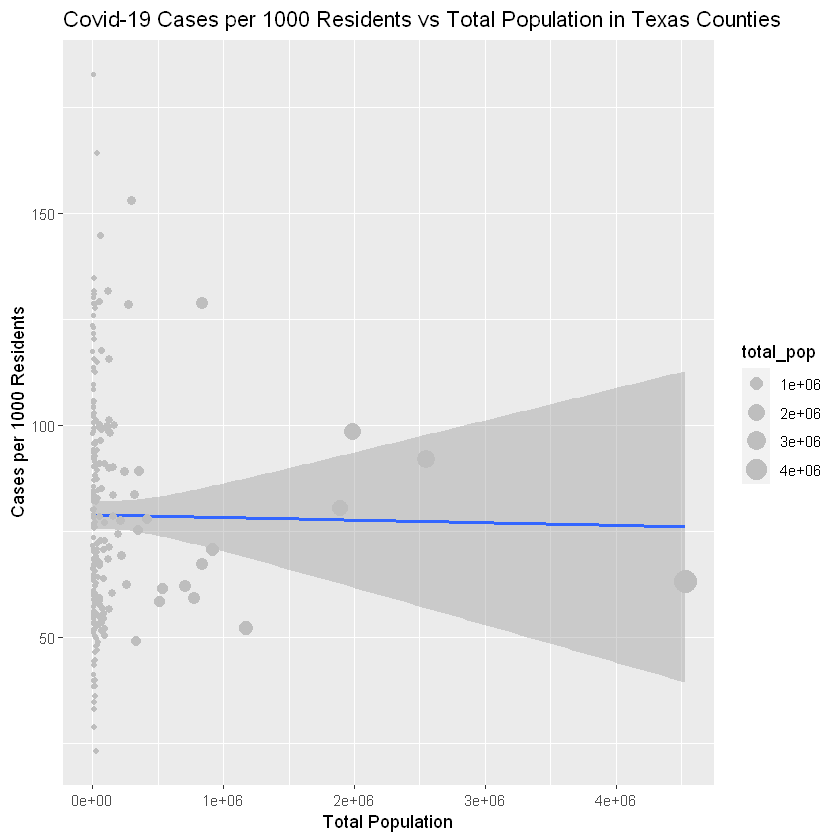

In [50]:
ggplot(cases_TX_select, mapping = aes(x= total_pop, y = cases_per_1000, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX_select, deaths_per_1000 > quantile(cases_per_1000, .95))) + 
scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
ggtitle("Covid-19 Cases per 1000 Residents vs Total Population in Texas Counties") +
  xlab("Total Population") +
  ylab("Cases per 1000 Residents")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


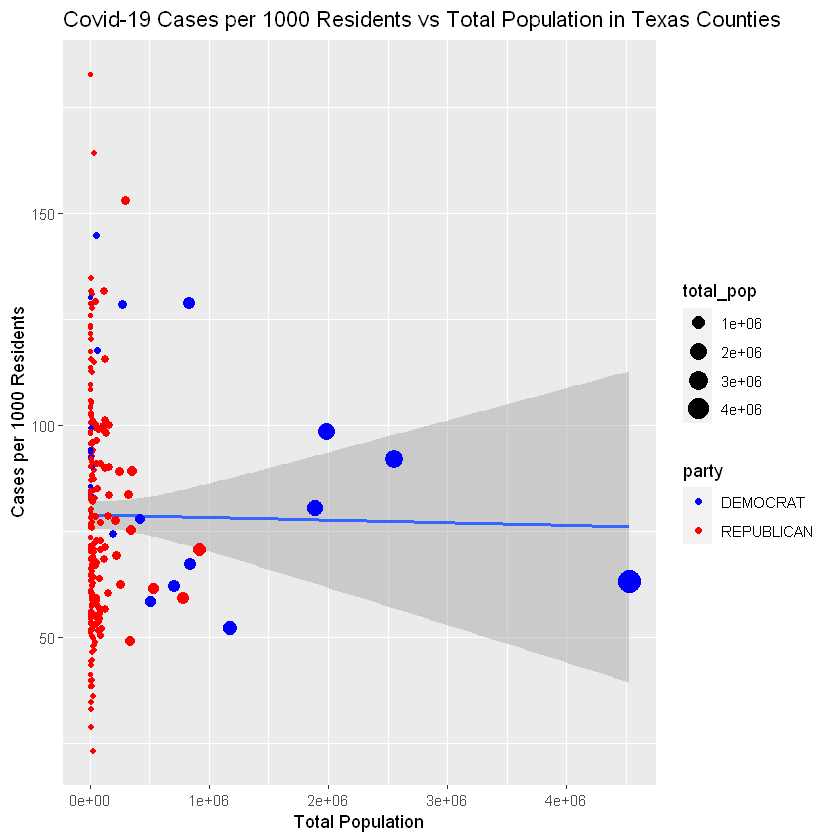

In [51]:
ggplot(cases_TX_select, mapping = aes(x= total_pop, y = cases_per_1000, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_text_repel(data = subset(cases_TX_select, deaths_per_1000 > quantile(cases_per_1000, .95))) + 
scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
ggtitle("Covid-19 Cases per 1000 Residents vs Total Population in Texas Counties") +
  xlab("Total Population") +
  ylab("Cases per 1000 Residents") + 
geom_point(mapping = aes(size = total_pop, color = party))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning messa

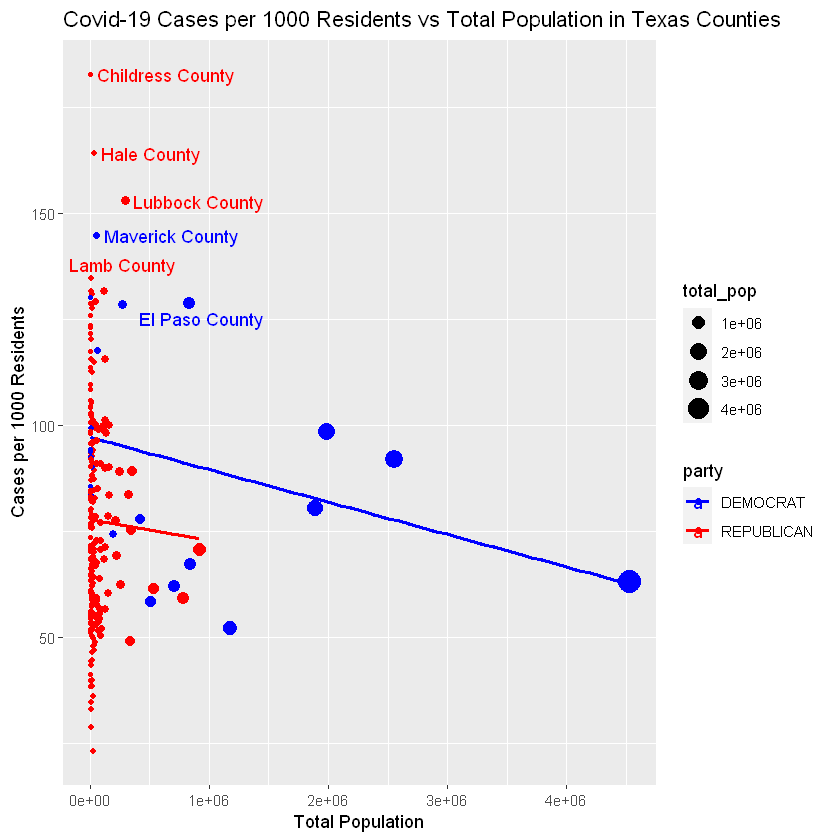

In [52]:
ggplot(cases_TX_select, mapping = aes(x= total_pop, y = cases_per_1000, color = party, label = county_name.x)) + 
  geom_smooth(data = subset(cases_TX_select, party == "REPUBLICAN"), method = lm, se = FALSE, linetype = "dotted", color = "red") +
  geom_smooth(data = subset(cases_TX_select, party == "DEMOCRAT"), method = lm, se = FALSE, linetype = "dotted", color = "blue") +
  geom_smooth(method = lm, se = FALSE) +
  geom_text_repel(data = subset(cases_TX_select, cases_per_1000 > quantile(cases_per_1000, .95))) + 
  scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
  ggtitle("Covid-19 Cases per 1000 Residents vs Total Population in Texas Counties") +
  xlab("Total Population") +
  ylab("Cases per 1000 Residents") + 
  geom_point(mapping = aes(size = total_pop, color = party))

In [53]:
datatable(cases_TX_select) %>% formatRound(6:7, 4) %>% formatPercentage(8, 2)

HTML widgets cannot be represented in plain text (need html)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


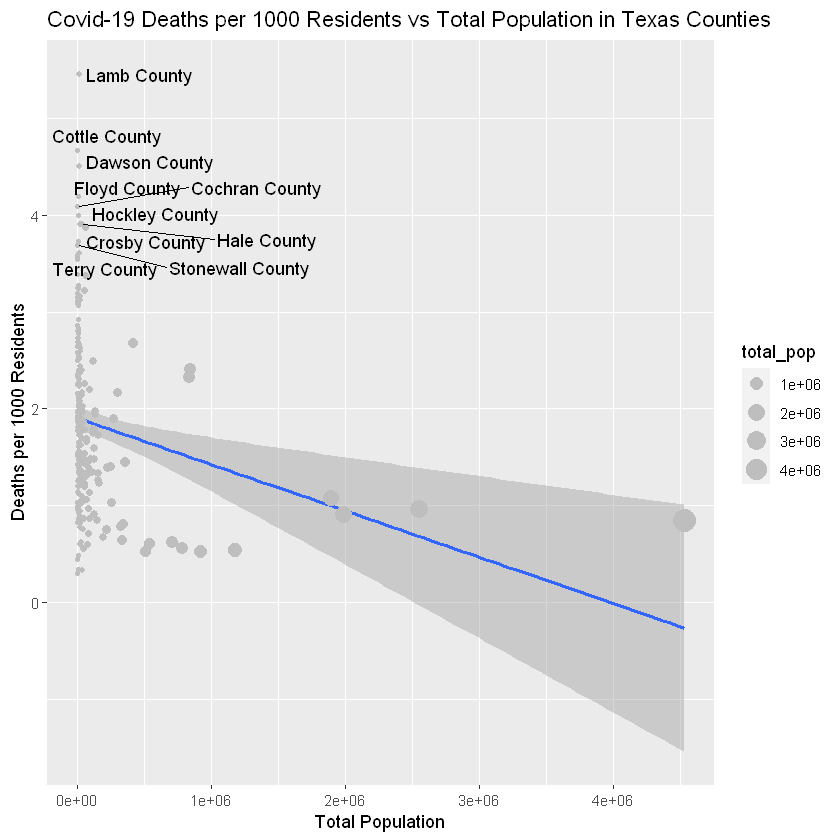

In [54]:
ggplot(cases_TX_select, mapping = aes(x= total_pop, y = deaths_per_1000, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX_select, deaths_per_1000 > quantile(deaths_per_1000, .95))) + 
ggtitle("Covid-19 Deaths per 1000 Residents vs Total Population in Texas Counties") +
  xlab("Total Population") +
  ylab("Deaths per 1000 Residents")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


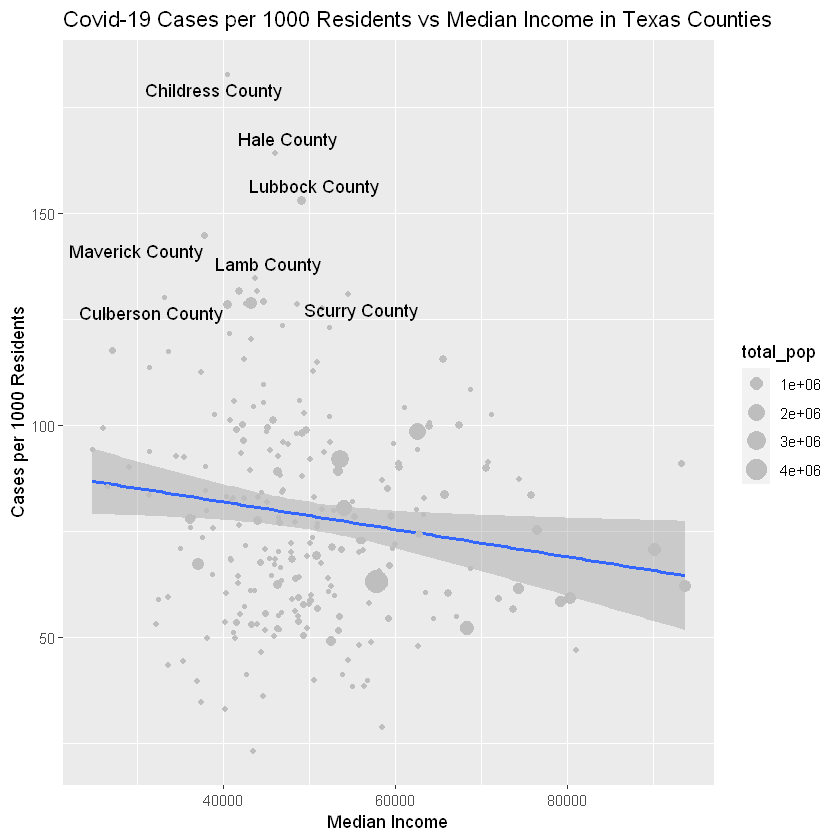

In [55]:
ggplot(cases_TX_select, mapping = aes(x= median_income, y = cases_per_1000, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX_select, cases_per_1000 > quantile(cases_per_1000, .95))) + 
  ggtitle("Covid-19 Cases per 1000 Residents vs Median Income in Texas Counties") +
  xlab("Median Income") +
  ylab("Cases per 1000 Residents")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


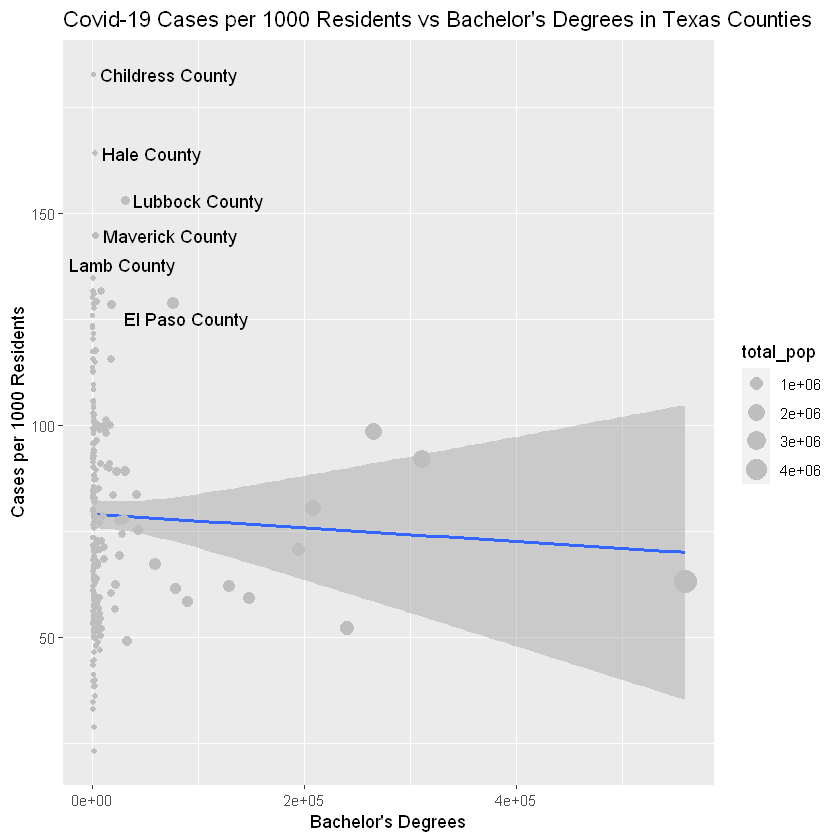

In [56]:
ggplot(cases_TX_select, mapping = aes(x= bachelors_degree, y = cases_per_1000, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX_select, cases_per_1000 > quantile(cases_per_1000, .95))) + 
  ggtitle("Covid-19 Cases per 1000 Residents vs Bachelor's Degrees in Texas Counties") +
  xlab("Bachelor's Degrees") +
  ylab("Cases per 1000 Residents")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


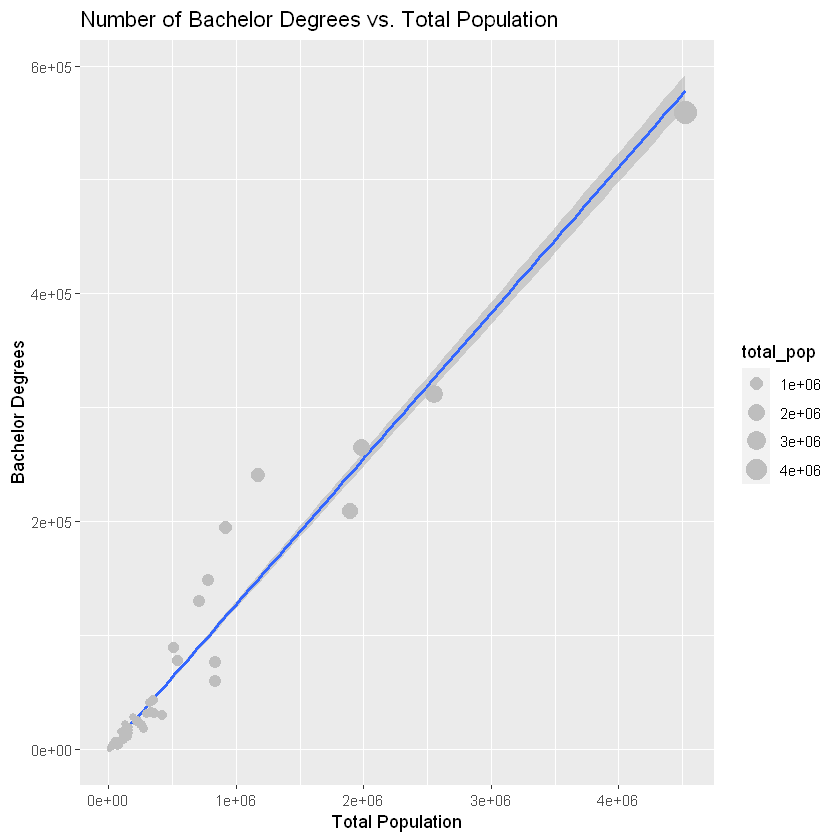

In [57]:
ggplot(cases_TX_select, mapping = aes(x= total_pop, y = bachelors_degree, label = county_name.x)) + 
  geom_smooth(method = lm) +
  geom_point(mapping = aes(size = total_pop), color = "grey") + 
  geom_text_repel(data = subset(cases_TX_select, deaths_per_1000 > quantile(cases_per_1000, .95))) + 
scale_color_manual(values = c("REPUBLICAN" = "red", "DEMOCRAT" = "blue")) +
ggtitle("Number of Bachelor Degrees vs. Total Population") +
  xlab("Total Population") +
  ylab("Bachelor Degrees")

`geom_smooth()` using formula = 'y ~ x'


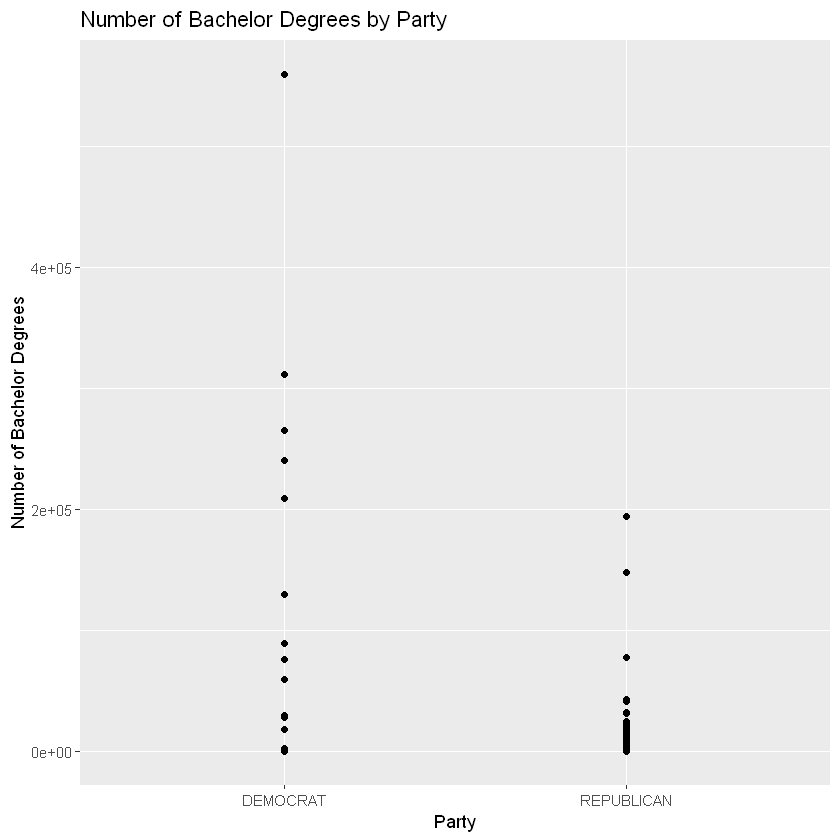

In [58]:
ggplot(cases_TX_select, aes(x = party, y = bachelors_degree)) + 
  geom_point() + 
  geom_smooth(method = "lm") + 
  ggtitle("Number of Bachelor Degrees by Party") +
  xlab("Party") + 
  ylab("Number of Bachelor Degrees")

In [59]:
cases_TX_select <- cases_TX %>% filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name.x, confirmed_cases, deaths, total_pop, median_income)
cases_TX_select <- cases_TX_select %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases)

head(cases_TX_select)

,county_name.x,confirmed_cases,deaths,total_pop,median_income,cases_per_1000,deaths_per_1000,death_per_case
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Harris County,286356,3825,4525519,57791,63.27584,0.8452069,0.013357499
2,Dallas County,234625,2453,2552213,53626,91.93002,0.9611267,0.010454981
3,Tarrant County,195518,1798,1983675,62532,98.56352,0.9063985,0.009196084
4,Bexar County,152231,2040,1892004,53999,80.46019,1.0782218,0.013400687
5,El Paso County,107552,1940,834825,43244,128.83179,2.3238403,0.018037786
6,Collin County,64721,483,914075,90124,70.80491,0.5284030,0.007462802


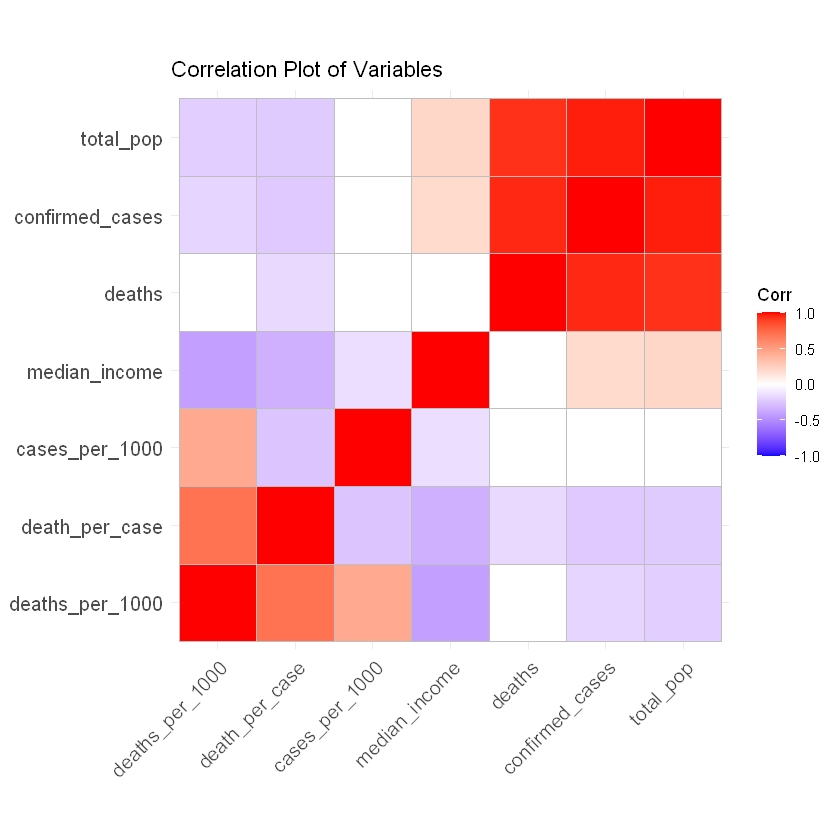

In [60]:
cor_TX <- cor(cases_TX_select[,-1])
ggcorrplot(cor_TX, p.mat = cor_pmat(cases_TX_select[,-1]), insig = "blank", hc.order = TRUE) +
ggtitle("Correlation Plot of Variables")

In [61]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% rename(c(county = subregion))

cases_TX <- cases_TX_select %>% mutate(county = county_name.x %>% str_to_lower() %>% 
    str_replace('\\s+county\\s*$', ''))

In [62]:
counties_TX <- counties_TX %>% left_join(cases_TX %>% 
    select(c(county, cases_per_1000, deaths_per_1000, death_per_case)))

Joining, by = "county"


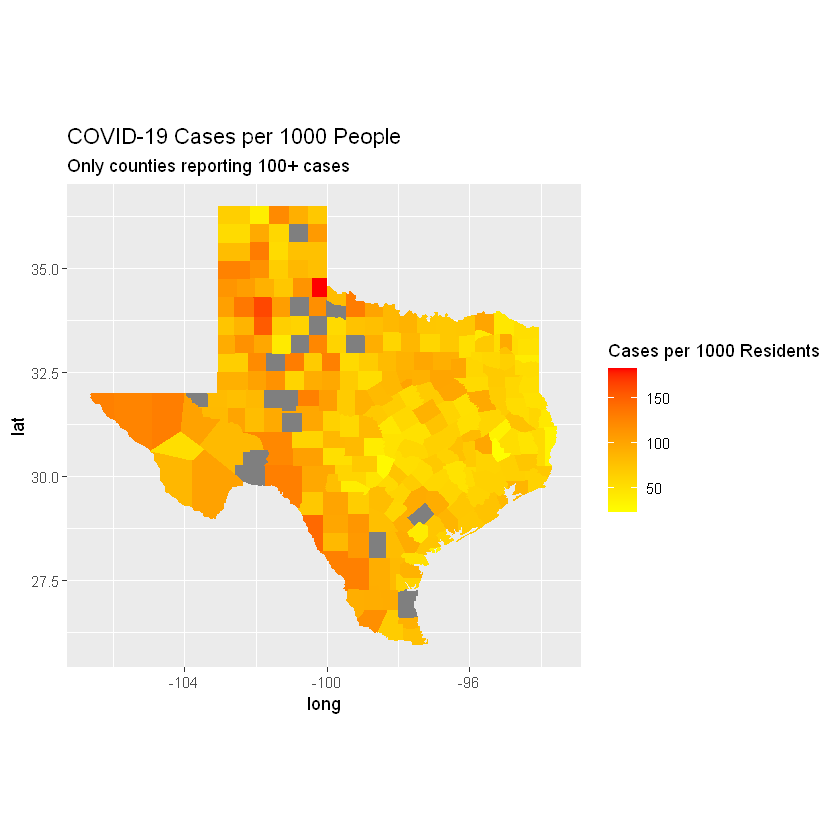

In [63]:
ggplot(counties_TX, aes(long, lat, label = county)) + 
  geom_polygon(aes(group = group, fill = cases_per_1000)) +
 # geom_text_repel(data = counties_TX %>% filter(complete.cases(.)) %>% group_by(county) %>% +
#    summarize(long = mean(long), lat = mean(lat)) %>% mutate(county = str_to_title(county))) +
  coord_quickmap() + 
  scale_fill_gradient(low="yellow", high="red") +
  labs(title = "COVID-19 Cases per 1000 People", subtitle = "Only counties reporting 100+ cases", fill="Cases per 1000 Residents")


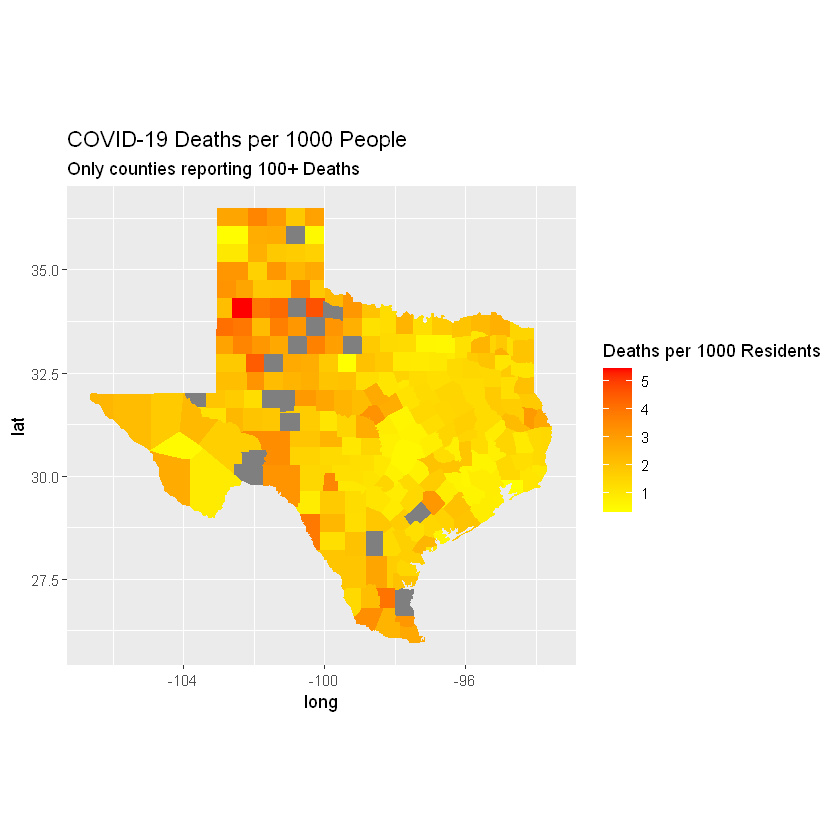

In [64]:
ggplot(counties_TX, aes(long, lat, label = county)) + 
  geom_polygon(aes(group = group, fill = deaths_per_1000)) +
 # geom_text_repel(data = counties_TX %>% filter(complete.cases(.)) %>% group_by(county) %>% 
#    summarize(long = mean(long), lat = mean(lat)) %>% mutate(county = str_to_title(county))) +
  coord_quickmap() + 
  scale_fill_gradient(low="yellow", high="red") +
  labs(title = "COVID-19 Deaths per 1000 People", subtitle = "Only counties reporting 100+ Deaths", fill="Deaths per 1000 Residents")


In [65]:
cases_Harris <- read_csv("COVID-19_cases_Harris.csv")

Rows: 1111 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): county_name, state
dbl  (4): county_fips_code, state_fips_code, confirmed_cases, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [66]:
cases_Harris

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>
48201,Harris County,TX,48,2020-01-22,0,0
48201,Harris County,TX,48,2020-01-23,0,0
48201,Harris County,TX,48,2020-01-24,0,0
48201,Harris County,TX,48,2020-01-25,0,0
48201,Harris County,TX,48,2020-01-26,0,0
48201,Harris County,TX,48,2020-01-27,0,0
48201,Harris County,TX,48,2020-01-28,0,0
48201,Harris County,TX,48,2020-01-29,0,0
48201,Harris County,TX,48,2020-01-30,0,0


In [67]:
summary(cases_Harris)

 county_fips_code county_name           state           state_fips_code
 Min.   :48201    Length:1111        Length:1111        Min.   :48     
 1st Qu.:48201    Class :character   Class :character   1st Qu.:48     
 Median :48201    Mode  :character   Mode  :character   Median :48     
 Mean   :48201                                          Mean   :48     
 3rd Qu.:48201                                          3rd Qu.:48     
 Max.   :48201                                          Max.   :48     
      date            confirmed_cases       deaths     
 Min.   :2020-01-22   Min.   :      0   Min.   :    0  
 1st Qu.:2020-10-25   1st Qu.: 158569   1st Qu.: 2892  
 Median :2021-07-30   Median : 418911   Median : 6795  
 Mean   :2021-07-30   Mean   : 568126   Mean   : 6762  
 3rd Qu.:2022-05-03   3rd Qu.:1025905   3rd Qu.:10961  
 Max.   :2023-02-05   Max.   :1246532   Max.   :11448  

In [68]:
cases_Houston <- cases_Harris %>% filter(county_name == "Harris County" & state == "TX")
dim(cases_Houston)

[1] 1111    7

In [69]:
missing_data <- colSums(is.na(cases_Houston))
print(missing_data)

county_fips_code      county_name            state  state_fips_code 
               0                0                0                0 
            date  confirmed_cases           deaths 
               0                0                0 


In [70]:
summary(cases_Houston['date'])

      date           
 Min.   :2020-01-22  
 1st Qu.:2020-10-25  
 Median :2021-07-30  
 Mean   :2021-07-30  
 3rd Qu.:2022-05-03  
 Max.   :2023-02-05  

In [71]:
fm(cases_Houston['date'])

[1] "2020-01-22"
[1] 1
    date 
320.8624 
    date 
102952.7 


In [72]:
summary(cases_Houston['county_fips_code'])

 county_fips_code
 Min.   :48201   
 1st Qu.:48201   
 Median :48201   
 Mean   :48201   
 3rd Qu.:48201   
 Max.   :48201   

In [73]:
fm(cases_Houston['county_fips_code'])

[1] "48201"
[1] 1111
county_fips_code 
               0 
county_fips_code 
               0 


In [74]:
fm(cases_Houston['county_name'])

[1] "Harris County"
[1] 1111


Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"


county_name 
         NA 


Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"


county_name 
         NA 


In [75]:
summary(cases_Houston['confirmed_cases'])

 confirmed_cases  
 Min.   :      0  
 1st Qu.: 158569  
 Median : 418911  
 Mean   : 568126  
 3rd Qu.:1025905  
 Max.   :1246532  

In [76]:
fm(cases_Houston['confirmed_cases'])

[1] "0"
[1] 44
confirmed_cases 
       443685.1 
confirmed_cases 
   196856467441 


In [77]:
stats <- boxplot.stats(cases_Houston$confirmed_cases)
print(stats)

$stats
[1]       0.0  158568.5  418911.0 1025905.0 1246532.0

$n
[1] 1111

$conf
[1] 377797.2 460024.8

$out
numeric(0)



In [78]:
duplicates <- cases_Houston[duplicated(cases_Houston$confirmed_cases),]
duplicates

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>
48201,Harris County,TX,48,2020-01-23,0,0
48201,Harris County,TX,48,2020-01-24,0,0
48201,Harris County,TX,48,2020-01-25,0,0
48201,Harris County,TX,48,2020-01-26,0,0
48201,Harris County,TX,48,2020-01-27,0,0
48201,Harris County,TX,48,2020-01-28,0,0
48201,Harris County,TX,48,2020-01-29,0,0
48201,Harris County,TX,48,2020-01-30,0,0
48201,Harris County,TX,48,2020-01-31,0,0


In [79]:
summary(cases_Houston['deaths'])

     deaths     
 Min.   :    0  
 1st Qu.: 2892  
 Median : 6795  
 Mean   : 6762  
 3rd Qu.:10961  
 Max.   :11448  

In [80]:
fm(cases_Houston['deaths'])

[1] "0"
[1] 56
  deaths 
4103.274 
  deaths 
16836854 


In [81]:
stats <- boxplot.stats(cases_Houston$confirmed_cases)
print(stats)

$stats
[1]       0.0  158568.5  418911.0 1025905.0 1246532.0

$n
[1] 1111

$conf
[1] 377797.2 460024.8

$out
numeric(0)



In [82]:
duplicates <- cases_Houston[duplicated(cases_Houston$deaths),]
duplicates

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>
48201,Harris County,TX,48,2020-01-23,0,0
48201,Harris County,TX,48,2020-01-24,0,0
48201,Harris County,TX,48,2020-01-25,0,0
48201,Harris County,TX,48,2020-01-26,0,0
48201,Harris County,TX,48,2020-01-27,0,0
48201,Harris County,TX,48,2020-01-28,0,0
48201,Harris County,TX,48,2020-01-29,0,0
48201,Harris County,TX,48,2020-01-30,0,0
48201,Harris County,TX,48,2020-01-31,0,0


In [83]:
cases_Houston <- cases_Houston %>%
  mutate(confirmed_cases_change = c(0, diff(confirmed_cases)),
         confirmed_cases_acceleration = c(0, diff(confirmed_cases_change)))
cases_Houston <- cases_Houston %>%
  mutate(deaths_change = c(0, diff(deaths)),
         deaths_acceleration = c(0, diff(deaths_change)))

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


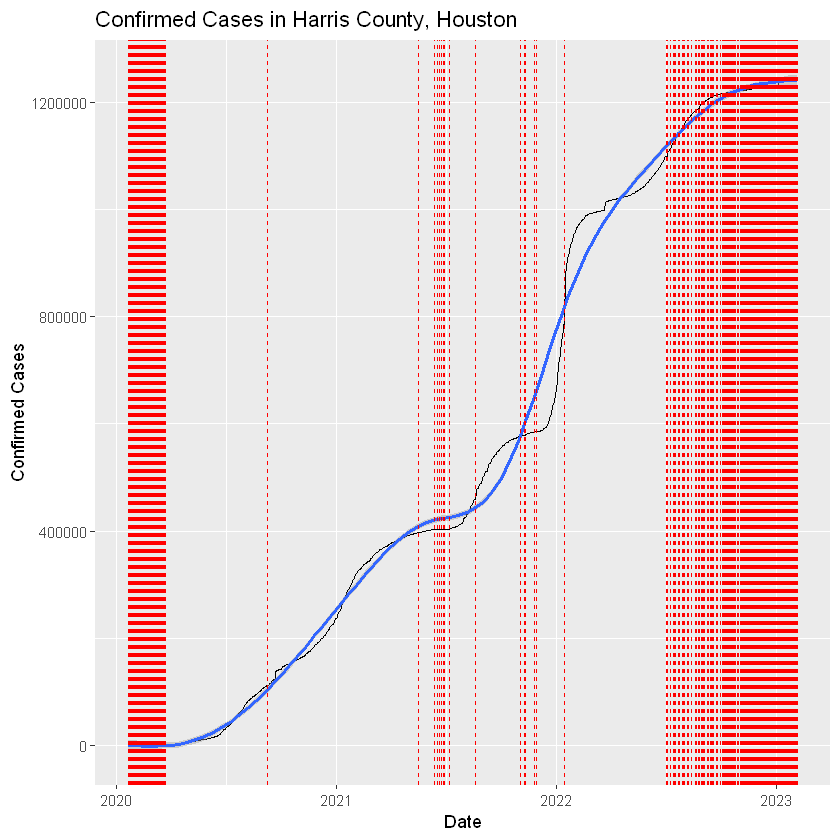

In [84]:
ggplot(cases_Houston, aes(x = date, y = confirmed_cases)) + 
  geom_line() + 
  geom_smooth() +
geom_vline(data = cases_Houston %>% filter(confirmed_cases_change < quantile(confirmed_cases_change, .20)), 
             aes(xintercept = date), color = "red", linetype = "dashed") +
  ggtitle("Confirmed Cases in Harris County, Houston") +
  xlab("Date") +
  ylab("Confirmed Cases")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


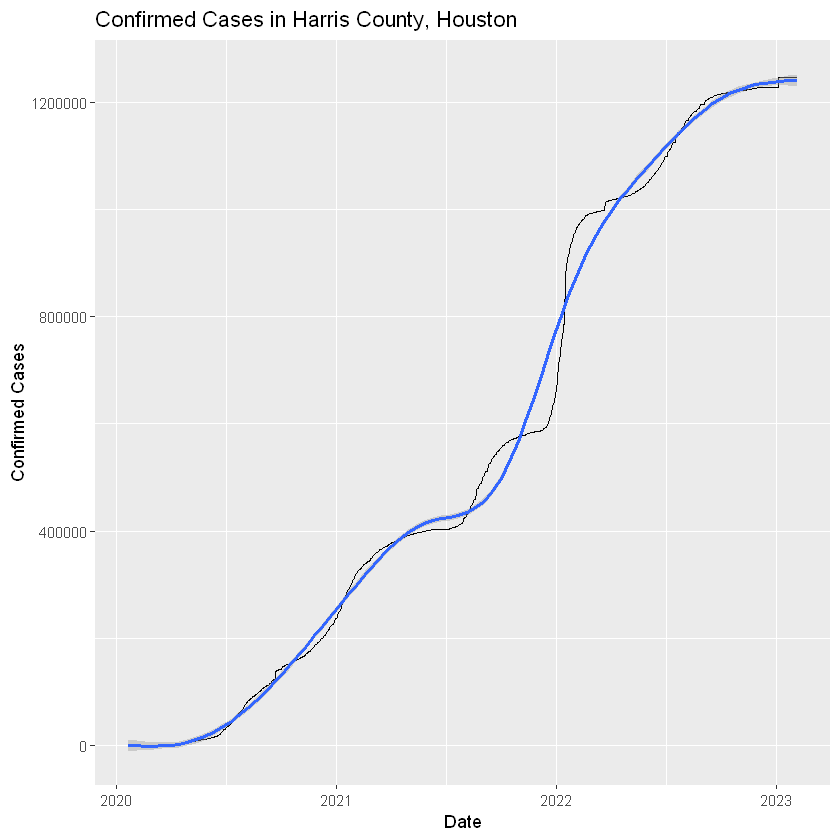

In [85]:
ggplot(cases_Houston, aes(x = date, y = confirmed_cases)) + 
  geom_line() + 
  geom_smooth() +
  ggtitle("Confirmed Cases in Harris County, Houston") +
  xlab("Date") +
  ylab("Confirmed Cases")

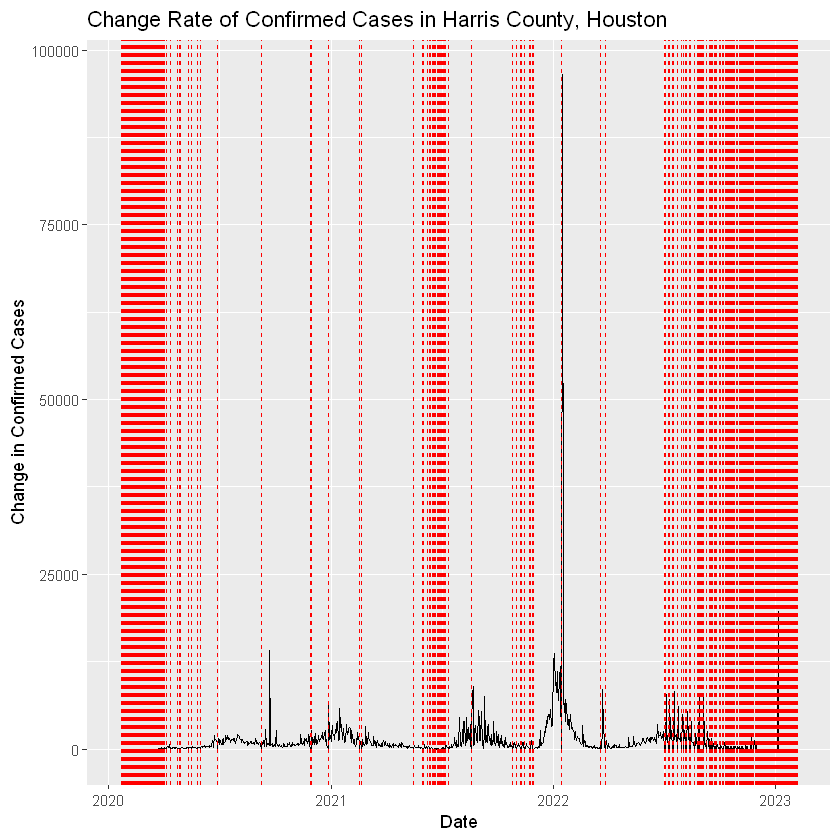

In [86]:
ggplot(cases_Houston, aes(x = date, y = confirmed_cases_change)) + 
  geom_line() + 
  geom_vline(data = cases_Houston %>% filter(confirmed_cases_change < quantile(confirmed_cases_change, .25)), 
             aes(xintercept = date), color = "red", linetype = "dashed") +
  ggtitle("Change Rate of Confirmed Cases in Harris County, Houston") +
  xlab("Date") +
  ylab("Change in Confirmed Cases")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


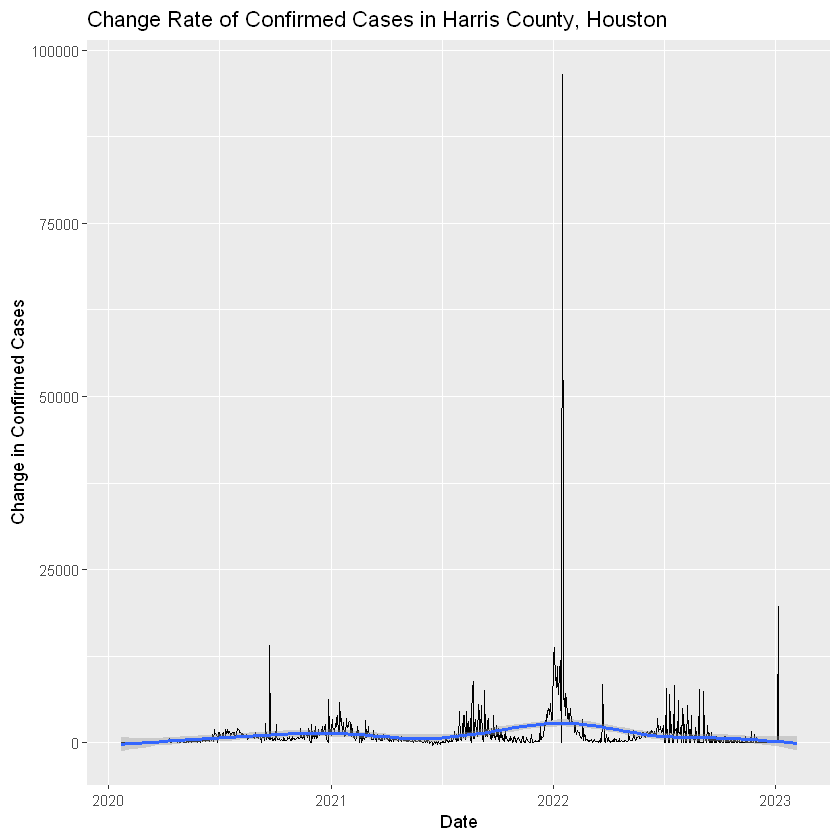

In [87]:
ggplot(cases_Houston, aes(x = date, y = confirmed_cases_change)) + 
  geom_line() + 
geom_smooth() +
  ggtitle("Change Rate of Confirmed Cases in Harris County, Houston") +
  xlab("Date") +
  ylab("Change in Confirmed Cases")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


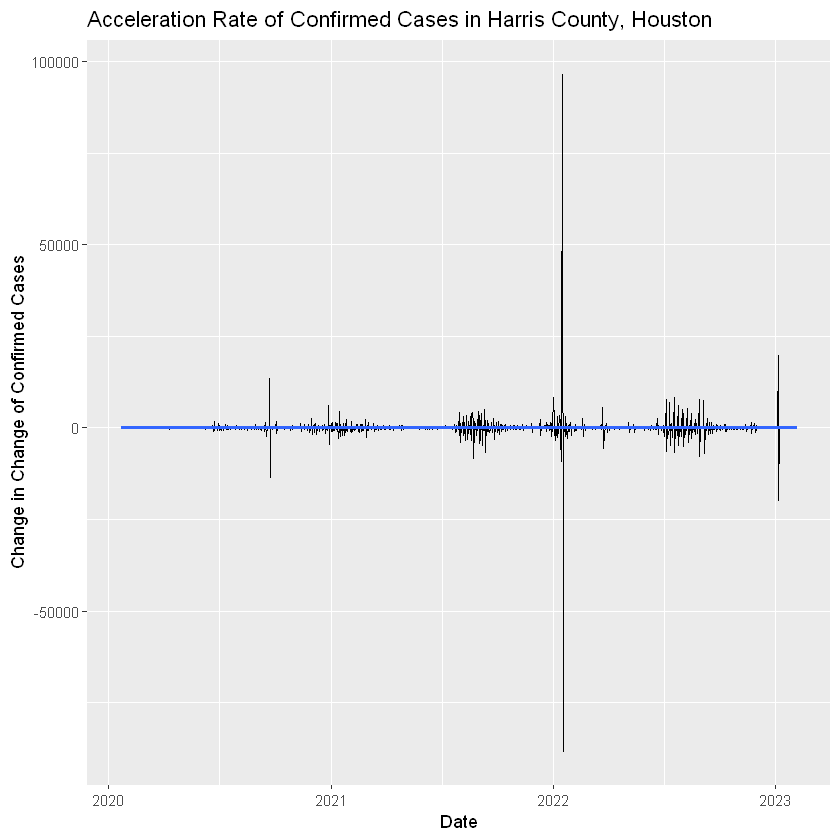

In [88]:
ggplot(cases_Houston, aes(x = date, y = confirmed_cases_acceleration)) + 
  geom_line() + 
    geom_smooth()+
  ggtitle("Acceleration Rate of Confirmed Cases in Harris County, Houston") +
  xlab("Date") +
  ylab("Change in Change of Confirmed Cases")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


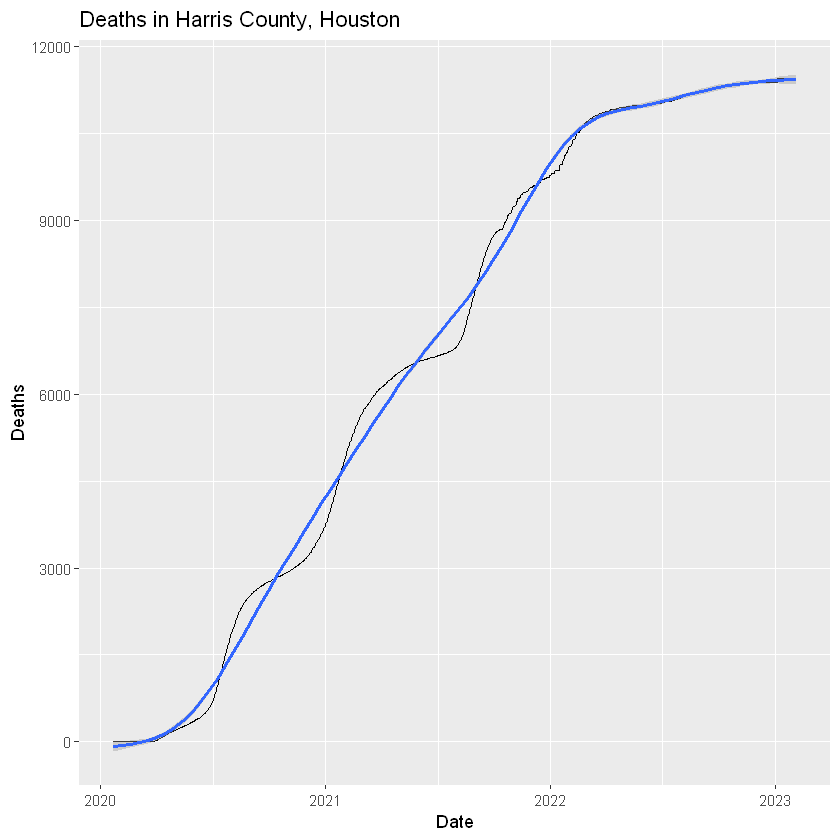

In [89]:
ggplot(cases_Houston, aes(x = date, y = deaths)) + 
  geom_line() + 
  geom_smooth() +
  geom_vline(data = cases_Houston %>% filter(deaths_change < quantile(deaths_change, .25)), 
             aes(xintercept = date), color = "red", linetype = "dashed") +
  ggtitle("Deaths in Harris County, Houston") +
  xlab("Date") +
  ylab("Deaths")

In [90]:
quantile(cases_Houston$deaths_change, .5)

50% 
  5

In [91]:
mobility <- read_csv("Global_Mobility_Report.csv", col_types =  cols(sub_region_2 = col_character()))

In [92]:
mobility <- mobility %>% mutate_if(is.character, factor)
dim(mobility)

[1] 11730025       15

In [93]:
head(mobility)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


In [94]:
summary(mobility)

 country_region_code        country_region   
 US     :2511994     United States :2511994  
 BR     :1960411     Brazil        :1960411  
 IN     : 649545     India         : 649545  
 TR     : 536074     Turkey        : 536074  
 AR     : 411307     Argentina     : 411307  
 (Other):5653450     United Kingdom: 406271  
 NA's   :   7244     (Other)       :5254423  
                     sub_region_1                 sub_region_2    
 State of São Paulo        :  361280   Washington County:  26372  
 State of Minas Gerais     :  257096   Jefferson County :  21673  
 Texas                     :  185210   Franklin County  :  20665  
 State of Paraná           :  151299   Jackson County   :  18877  
 State of Rio Grande do Sul:  149239   Lincoln County   :  17862  
 (Other)                   :10432136   (Other)          :9719241  
 NA's                      :  193765   NA's             :1905335  
                        metro_area       iso_3166_2_code   census_fips_code 
 Abbottabad Metropo

In [95]:
mobility_Houston <- mobility %>% filter(sub_region_1 == "Texas" & sub_region_2 == "Harris County")
dim(mobility_Houston)

[1] 974  15

In [96]:
mobility_Houston

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-15,3,2,13,0,2,-1
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-16,6,1,16,-2,0,-1
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-17,6,2,27,-3,-13,3
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-18,2,1,12,3,2,0
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-19,1,1,7,1,3,0
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-20,-1,-4,-22,-4,0,2
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-21,2,-1,3,1,2,0
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-22,4,0,17,0,5,-1
US,United States,Texas,Harris County,NA,NA,48201,ChIJ9TB__YrMQIYR2tK7sndSry4,2020-02-23,5,-1,-2,0,2,0


In [97]:
missing_data <- colSums(is.na(mobility_Houston))
print(missing_data)

                               country_region_code 
                                                 0 
                                    country_region 
                                                 0 
                                      sub_region_1 
                                                 0 
                                      sub_region_2 
                                                 0 
                                        metro_area 
                                               974 
                                   iso_3166_2_code 
                                               974 
                                  census_fips_code 
                                                 0 
                                          place_id 
                                                 0 
                                              date 
                                                 0 
retail_and_recreation_percent_change_from_baseline 
            

In [98]:
fm(mobility_Houston['sub_region_1'])

[1] "Texas"
[1] 974


ERROR: Error in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm): Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.


In [99]:
fm(mobility_Houston['sub_region_2'])

[1] "Harris County"
[1] 974


ERROR: Error in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm): Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.


In [100]:
summary(mobility_Houston['date'])

      date           
 Min.   :2020-02-15  
 1st Qu.:2020-10-15  
 Median :2021-06-15  
 Mean   :2021-06-15  
 3rd Qu.:2022-02-13  
 Max.   :2022-10-15  

In [145]:
fm(mobility_Houston['date'])

[1] "2020-02-15"
[1] 1
    date 
281.3139 
   date 
79137.5 


In [146]:
summary(mobility_Houston['retail_and_recreation_percent_change_from_baseline'])

 retail_and_recreation_percent_change_from_baseline
 Min.   :-80.00                                    
 1st Qu.:-17.00                                    
 Median :-13.00                                    
 Mean   :-13.69                                    
 3rd Qu.: -8.00                                    
 Max.   : 14.00                                    

In [147]:
fm(mobility_Houston['retail_and_recreation_percent_change_from_baseline'])

[1] "-14"
[1] 67
retail_and_recreation_percent_change_from_baseline 
                                          9.834289 
retail_and_recreation_percent_change_from_baseline 
                                          96.71324 


In [104]:
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [148]:
mobility_Houston_monthly <- mobility_Houston %>%
  mutate(date = as.Date(date)) %>%
  group_by(month = floor_date(date, "month")) %>%
  summarize(mean_mobility = mean(retail_and_recreation_percent_change_from_baseline))
mobility_Houston_monthly <- mobility_Houston_monthly %>%
  mutate(mean_mobility_change = c(0, diff(mean_mobility)))

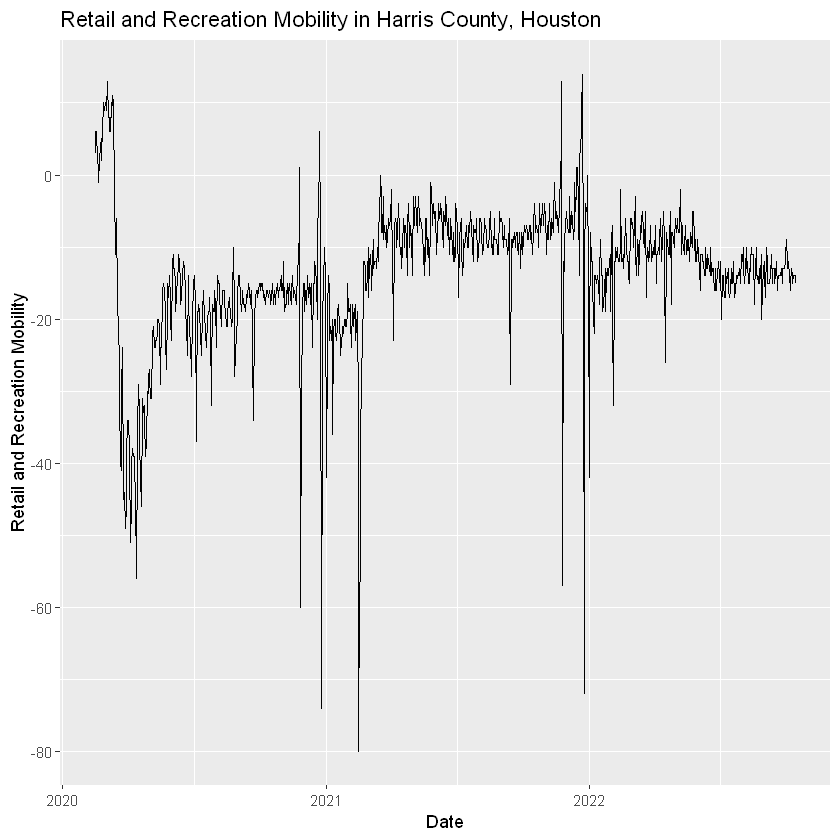

In [106]:
ggplot(mobility_Houston, aes(x = date, y = retail_and_recreation_percent_change_from_baseline)) + 
  geom_line() + 
  ggtitle("Retail and Recreation Mobility in Harris County, Houston") +
  xlab("Date") +
  ylab("Retail and Recreation Mobility")

In [107]:
ggplot(mobility_Houston_monthly, aes(x = month, y = mean_mobility)) + 
  geom_line() + 
geom_vline(data = mobility_Houston_monthly %>% filter(mean_mobility_change < quantile(mean_mobility_change, .25)), 
             aes(xintercept = month), color = "blue", linetype = "dashed") +
geom_vline(data = mobility_Houston_monthly %>% filter(mean_mobility_change > quantile(mean_mobility_change, .75)), 
             aes(xintercept = month), color = "red", linetype = "dashed") +
  ggtitle("Retail and Recreation Mobility in Harris County, Houston (Monthly)") +
  xlab("Month") +
  ylab("Retail and Recreation Mobility")

ERROR: Error in ggplot(mobility_Houston_monthly, aes(x = month, y = mean_mobility)): object 'mobility_Houston_monthly' not found


In [108]:
library(scales)
lower_quantile_threshold <- quantile(mobility_Houston_monthly$mean_mobility_change, probs = 0.25)
upper_quantile_threshold <- quantile(mobility_Houston_monthly$mean_mobility_change, probs = 0.75)
ggplot(mobility_Houston_monthly, aes(x = month, y = mean_mobility)) + 
  geom_line() + 
  geom_vline(data = mobility_Houston_monthly %>% filter(mean_mobility_change < lower_quantile_threshold), 
             aes(xintercept = month), color = "blue", linetype = "dashed") +
geom_vline(data = mobility_Houston_monthly %>% filter(mean_mobility_change > quantile(mean_mobility_change, .75)), 
             aes(xintercept = month), color = "red", linetype = "dashed") +
  ggtitle("Retail and Recreation Mobility in Harris County, Houston (Monthly)") +
  xlab("Month") +
  ylab("Retail and Recreation Mobility") +
  geom_text_repel(data = mobility_Houston_monthly %>% filter(mean_mobility_change < lower_quantile_threshold),
                  aes(label = format(month, "%b %Y"), x = month, y = mean_mobility), 
                  nudge_x = 0.5, size = 3) +
geom_text_repel(data = mobility_Houston_monthly %>% filter(mean_mobility_change > upper_quantile_threshold),
                  aes(label = format(month, "%b %Y"), x = month, y = mean_mobility), 
                  nudge_x = 0.5, size = 3)


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




ERROR: Error in quantile(mobility_Houston_monthly$mean_mobility_change, probs = 0.25): object 'mobility_Houston_monthly' not found


In [109]:
lower_quantile_threshold <- quantile(mobility_Houston_monthly$mean_mobility_change, probs = 0.25)

# Plot the data with a fitted line and highlight areas below the lower quantile threshold
ggplot(mobility_Houston_monthly, aes(x = month, y = mean_mobility_change)) + 
  geom_line() + 
  geom_rect(data = mobility_Houston_monthly %>% filter(mean_mobility_change <= 0), 
            aes(xmin = as.numeric(month) - 0.5, xmax = as.numeric(month) + 0.5, 
                ymin = -Inf, ymax = Inf), fill = "blue", alpha = 0.2) +
  ggtitle("Retail and Recreation Mobility in Harris County, Houston (Monthly)") +
  xlab("Month") +
  ylab("Retail and Recreation Mobility")

ERROR: Error in quantile(mobility_Houston_monthly$mean_mobility_change, probs = 0.25): object 'mobility_Houston_monthly' not found


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


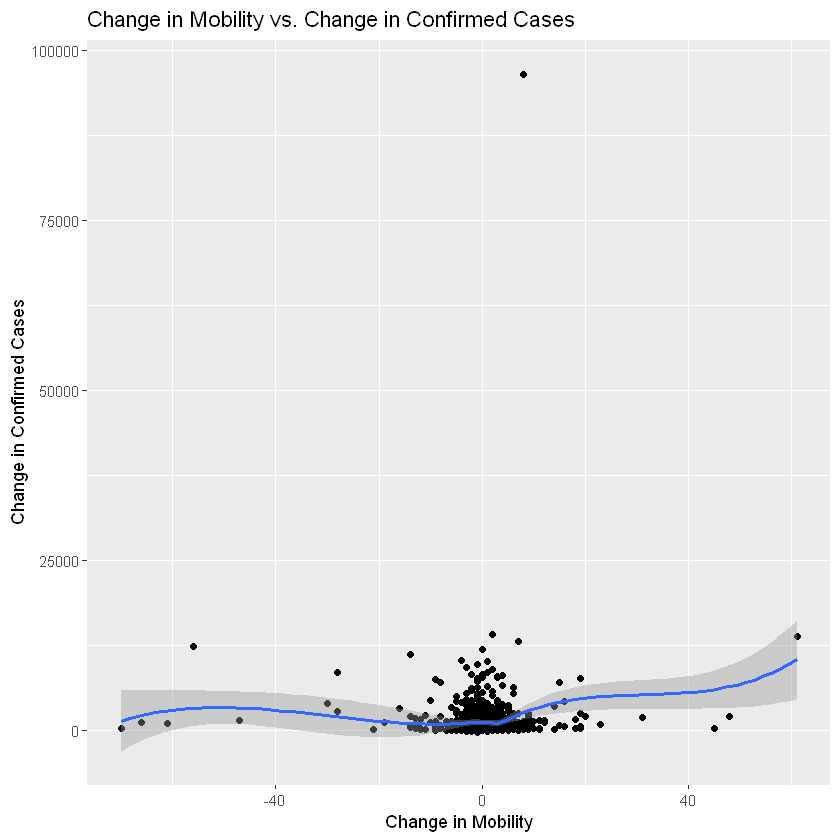

In [110]:
cases_Houston_shifted <- cases_Houston
cases_Houston_shifted$date <- cases_Houston_shifted$date - days(7)

# Merge the mobility and cases data frames based on the date column
df_merged <- merge(mobility_Houston, cases_Houston_shifted, by = "date")

# Plot the change in mobility against the change in confirmed cases
df_merged_diff <- data.frame(x = diff(df_merged$retail_and_recreation_percent_change_from_baseline), 
                             y = diff(df_merged$confirmed_cases))
ggplot(df_merged_diff, aes(x = x, y = y)) +
  geom_point() +
   geom_smooth() +
  ggtitle("Change in Mobility vs. Change in Confirmed Cases") +
  xlab("Change in Mobility") +
  ylab("Change in Confirmed Cases")

In [111]:
install.packages(rsq)

ERROR: Error in install.packages(rsq): object 'rsq' not found


In [112]:
cases_Houston

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,confirmed_cases_change,confirmed_cases_acceleration,deaths_change,deaths_acceleration
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48201,Harris County,TX,48,2020-01-22,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-23,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-24,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-25,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-26,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-27,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-28,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-29,0,0,0,0,0,0
48201,Harris County,TX,48,2020-01-30,0,0,0,0,0,0


In [159]:
new_cases_TX = cases_TX[, c('county_name.x', 'total_pop', 'median_income', 'party', 'bachelors_degree')]

In [119]:
cases_TX

county_fips_code,county_name.x,state.x,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,⋯,state.y,state_po,county_name.y,office,candidate,party,candidatevotes,totalvotes,version,mode
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
48001,Anderson County,TX,48,2021-01-19,5575,75,48001,4956,11611,⋯,TEXAS,TX,ANDERSON,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,15110,19227,20220315,TOTAL
48003,Andrews County,TX,48,2021-01-19,1606,37,48003,1256,4157,⋯,TEXAS,TX,ANDREWS,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,4943,5863,20220315,TOTAL
48005,Angelina County,TX,48,2021-01-19,6765,193,48005,8531,22400,⋯,TEXAS,TX,ANGELINA,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,25076,34574,20220315,TOTAL
48007,Aransas County,TX,48,2021-01-19,895,26,48007,3252,6277,⋯,TEXAS,TX,ARANSAS,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,9239,12290,20220315,TOTAL
48009,Archer County,TX,48,2021-01-19,694,10,48009,960,2391,⋯,TEXAS,TX,ARCHER,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,4300,4796,20220315,TOTAL
48011,Armstrong County,TX,48,2021-01-19,128,6,48011,162,540,⋯,TEXAS,TX,ARMSTRONG,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,1035,1112,20220315,TOTAL
48013,Atascosa County,TX,48,2021-01-19,3781,90,48013,3690,11819,⋯,TEXAS,TX,ATASCOSA,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,12039,18118,20220315,TOTAL
48015,Austin County,TX,48,2021-01-19,1404,18,48015,2890,8131,⋯,TEXAS,TX,AUSTIN,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,11447,14554,20220315,TOTAL
48017,Bailey County,TX,48,2021-01-19,742,15,48017,530,1700,⋯,TEXAS,TX,BAILEY,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,1434,1860,20220315,TOTAL


In [160]:
merged_table <- merge(new_cases_TX, cases_Houston, by.x = "county_name.x", by.y = "county_name")

In [161]:
merged_table <- merged_table %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases)

In [162]:
subset_mobility <- mobility_Houston[c("date", "retail_and_recreation_percent_change_from_baseline")]
merged_table3 <- merge(merged_table, subset_mobility, by = "date")

In [179]:
merged_table3

date,county_name.x,total_pop,median_income,party,bachelors_degree,county_fips_code,state,state_fips_code,confirmed_cases,deaths,confirmed_cases_change,confirmed_cases_acceleration,deaths_change,deaths_acceleration,cases_per_1000,deaths_per_1000,death_per_case,retail_and_recreation_percent_change_from_baseline,month
<date>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2020-02-15,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,3,02
2020-02-16,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,6,02
2020-02-17,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,6,02
2020-02-18,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,2,02
2020-02-19,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,1,02
2020-02-20,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,-1,02
2020-02-21,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,2,02
2020-02-22,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,4,02
2020-02-23,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,0,0,0,0,0,0.0000000000,0,NaN,5,02


In [189]:
merged_table3$date <- as.Date(merged_table3$date)
mobility_Houston_monthly$month <- as.Date(mobility_Houston_monthly$month)

merged_table3$month <- format(merged_table3$date, "%Y-%m")
mobility_Houston_monthly$only_month <- format(mobility_Houston_monthly$month, "%Y-%m")

merged_table4 <- merge(merged_table3, mobility_Houston_monthly,by.x = "month", by.y = "only_month", all.x = TRUE)

merged_table4$month <- NULL
merged_table4$month.y <- NULL

In [190]:
merged_table4

date,county_name.x,total_pop,median_income,party,bachelors_degree,county_fips_code,state,state_fips_code,confirmed_cases,⋯,confirmed_cases_change,confirmed_cases_acceleration,deaths_change,deaths_acceleration,cases_per_1000,deaths_per_1000,death_per_case,retail_and_recreation_percent_change_from_baseline,mean_mobility,mean_mobility_change
<date>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-15,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,3,5.00000,0.00000
2020-02-16,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,6,5.00000,0.00000
2020-02-17,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,6,5.00000,0.00000
2020-02-18,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,2,5.00000,0.00000
2020-02-19,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,1,5.00000,0.00000
2020-02-20,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,-1,5.00000,0.00000
2020-02-21,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,2,5.00000,0.00000
2020-02-22,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,4,5.00000,0.00000
2020-02-23,Harris County,4525519,57791,DEMOCRAT,559393,48201,TX,48,0,⋯,0,0,0,0,0.0000000000,0,NaN,5,5.00000,0.00000


In [166]:
colnames(merged_table4)

[1] "date"                                              
 [2] "county_name.x"                                     
 [3] "total_pop"                                         
 [4] "median_income"                                     
 [5] "party"                                             
 [6] "bachelors_degree"                                  
 [7] "county_fips_code"                                  
 [8] "state"                                             
 [9] "state_fips_code"                                   
[10] "confirmed_cases"                                   
[11] "deaths"                                            
[12] "confirmed_cases_change"                            
[13] "confirmed_cases_acceleration"                      
[14] "deaths_change"                                     
[15] "deaths_acceleration"                               
[16] "cases_per_1000"                                    
[17] "deaths_per_1000"                                   
[18] "death_per_case"                                    
[19] "retail_and_recreation_percent_change_from_baseline"
[20] "mean_mobility"                                     
[21] "mean_mobility_change"

In [191]:
merged_table_reordered <- merged_table4[c('county_fips_code', 'county_name.x', 
                                          'state', 'date', 'median_income', 
                                          'confirmed_cases', 'deaths', 'cases_per_1000', 
                                          'deaths_per_1000', 'death_per_case', 
                                          'confirmed_cases_change','deaths_change',
                                         'confirmed_cases_acceleration', 'deaths_acceleration', 
                                         'total_pop', 'bachelors_degree', 'party',
                                          'retail_and_recreation_percent_change_from_baseline', 
                                          'mean_mobility', 'mean_mobility_change')]

In [192]:
merged_table_reordered

county_fips_code,county_name.x,state,date,median_income,confirmed_cases,deaths,cases_per_1000,deaths_per_1000,death_per_case,confirmed_cases_change,deaths_change,confirmed_cases_acceleration,deaths_acceleration,total_pop,bachelors_degree,party,retail_and_recreation_percent_change_from_baseline,mean_mobility,mean_mobility_change
<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
48201,Harris County,TX,2020-02-15,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,3,5.00000,0.00000
48201,Harris County,TX,2020-02-16,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,6,5.00000,0.00000
48201,Harris County,TX,2020-02-17,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,6,5.00000,0.00000
48201,Harris County,TX,2020-02-18,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,2,5.00000,0.00000
48201,Harris County,TX,2020-02-19,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,1,5.00000,0.00000
48201,Harris County,TX,2020-02-20,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,-1,5.00000,0.00000
48201,Harris County,TX,2020-02-21,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,2,5.00000,0.00000
48201,Harris County,TX,2020-02-22,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,4,5.00000,0.00000
48201,Harris County,TX,2020-02-23,57791,0,0,0.0000000000,0,NaN,0,0,0,0,4525519,559393,DEMOCRAT,5,5.00000,0.00000
